# Import Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression


In [69]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



In [208]:
df=pd.read_csv("C:/Users/nithi/Desktop/Hackathon/train_loan_data.csv")
#lets import the csv file

In [ ]:
df.head()

In [251]:
df.describe().T


count           mean            std     min       25%  \
annual_inc            80000.0   76046.143138   69020.055377    0.00  46000.00   
fico_range_high       80000.0     699.987975      31.734840  664.00    674.00   
fico_range_low        80000.0     695.987813      31.734075  660.00    670.00   
int_rate              80000.0      13.232898       4.771705    5.31      9.75   
loan_amnt             80000.0   14403.867813    8703.826298  750.00   7925.00   
num_actv_bc_tl        76052.0       3.633790       2.262505    0.00      2.00   
mort_acc              77229.0       1.674759       2.005104    0.00      0.00   
tot_cur_bal           76052.0  141586.358991  159371.366632    0.00  29642.00   
open_acc              80000.0      11.605675       5.483362    1.00      8.00   
pub_rec               80000.0       0.216675       0.579854    0.00      0.00   
pub_rec_bankruptcies  79969.0       0.137103       0.383202    0.00      0.00   
revol_bal             80000.0   16289.340975   22649.147472    0.00   5965.75   
revol_util            79947.0      51.899142      24.504836    0.00     33.50   
total_acc             80000.0      25.036875      12.009194    2.00     16.00   

                           50%        75%         max  
annual_inc            65000.00   90000.00  7141778.00  
fico_range_high         694.00     714.00      850.00  
fico_range_low          690.00     710.00      845.00  
int_rate                 12.74      15.99       30.99  
loan_amnt             12000.00   20000.00    40000.00  
num_actv_bc_tl            3.00       5.00       32.00  
mort_acc                  1.00       3.00       32.00  
tot_cur_bal           81000.50  211027.25  5172185.00  
open_acc                 11.00      14.00       80.00  
pub_rec                   0.00       0.00       24.00  
pub_rec_bankruptcies      0.00       0.00        7.00  
revol_bal             11111.00   19635.00  1023940.00  
revol_util               52.20      70.80      152.60  
total_acc                23.00      32.00      162.00

In [ ]:
df.info()

In [ ]:
df['emp_title'].unique()

In [209]:
for x in df.columns:
    print(f"unique terms in {x}",df[x].nunique())

unique terms in addr_state 51
unique terms in annual_inc 7536
unique terms in earliest_cr_line 640
unique terms in emp_length 11
unique terms in emp_title 36661
unique terms in fico_range_high 38
unique terms in fico_range_low 38
unique terms in grade 7
unique terms in home_ownership 6
unique terms in application_type 2
unique terms in initial_list_status 2
unique terms in int_rate 549
unique terms in loan_amnt 1373
unique terms in num_actv_bc_tl 28
unique terms in mort_acc 28
unique terms in tot_cur_bal 65410
unique terms in open_acc 56
unique terms in pub_rec 15
unique terms in pub_rec_bankruptcies 8
unique terms in purpose 14
unique terms in revol_bal 32971
unique terms in revol_util 1080
unique terms in sub_grade 35
unique terms in term 2
unique terms in title 5348
unique terms in total_acc 107
unique terms in verification_status 3
unique terms in loan_status 2


In [ ]:
# 1) unique terms in emp_title is too high either reduce dimensionality or remove column completely

# Handling missing data

In [4]:
missing_values = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['missing_values_percent'])

#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
missing_values[missing_values['missing_values_percent']!=0.00].sort_values('missing_values_percent',ascending=False)

missing_values_percent
emp_title                               6.27
emp_length                              5.74
num_actv_bc_tl                          4.93
tot_cur_bal                             4.93
mort_acc                                3.46
title                                   1.21
revol_util                              0.07
pub_rec_bankruptcies                    0.04

In [5]:
df['emp_length'].value_counts()

emp_length
10+ years    26278
2 years       7319
3 years       6474
< 1 year      6297
1 year        5294
5 years       5094
4 years       4763
6 years       3691
7 years       3597
8 years       3583
9 years       3022
Name: count, dtype: int64

In [5]:
df['emp_length'].fillna('Unknown', inplace=True)

In [ ]:

df['num_actv_bc_tl'].value_counts()

In [6]:

mean_num_actv_bc_tl =df['num_actv_bc_tl'].mean()
df['num_actv_bc_tl'].fillna(mean_num_actv_bc_tl, inplace=True)

In [ ]:

df['mort_acc'].value_counts()

In [7]:
mean_mort_acc=df['mort_acc'].mean()
df['mort_acc'].fillna(mean_mort_acc, inplace=True)

In [ ]:
df['tot_cur_bal'].value_counts()

In [8]:
mode_tot_cur_bal=df['tot_cur_bal'].mode()[0]
df['tot_cur_bal'].fillna(mode_tot_cur_bal, inplace=True)

In [ ]:
df['emp_title'].value_counts()

In [9]:
df['emp_title'].fillna('Unknown', inplace=True)

In [10]:
df.dropna(inplace=True)
#since these missing values are less than 5% i would rather drop those rows than modify them

In [11]:
missing_values = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['missing_values_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
missing_values[missing_values['missing_values_percent']!=0.00].sort_values('missing_values_percent',ascending=False)

Empty DataFrame
Columns: [missing_values_percent]
Index: []

# Univarate analysis

In [216]:
def cat_num_split(df):
    cat_cols=df.select_dtypes(include=['object']).columns
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    return cat_cols,num_cols

In [217]:
cat_cols,num_cols=cat_num_split(df)

In [218]:
cat_cols

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

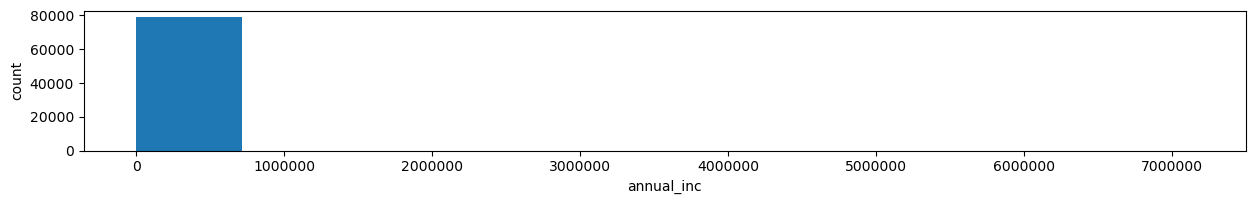

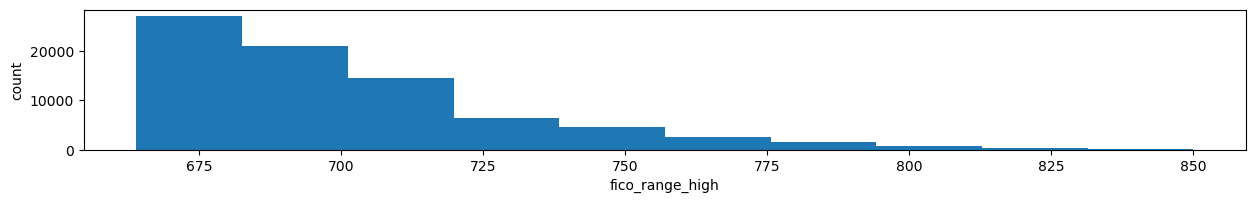

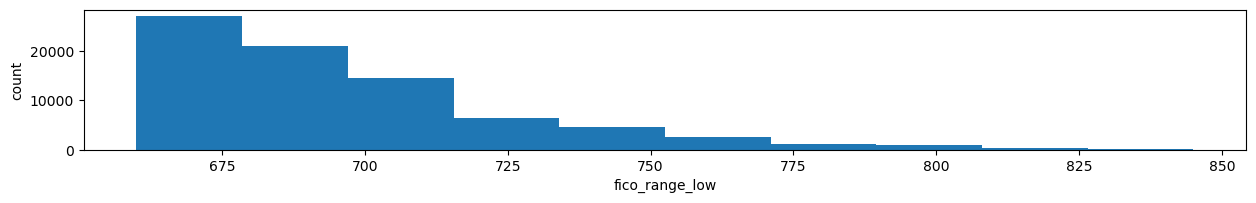

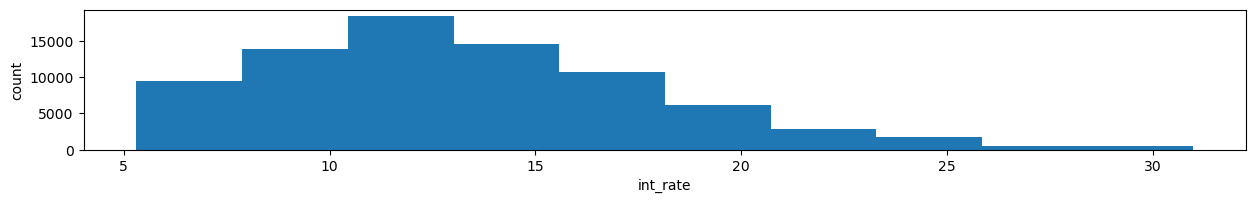

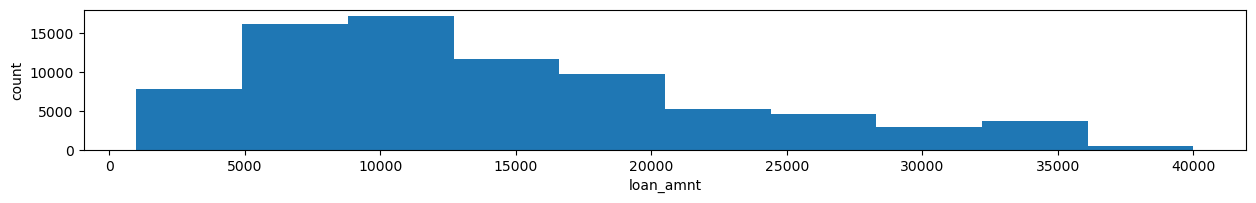

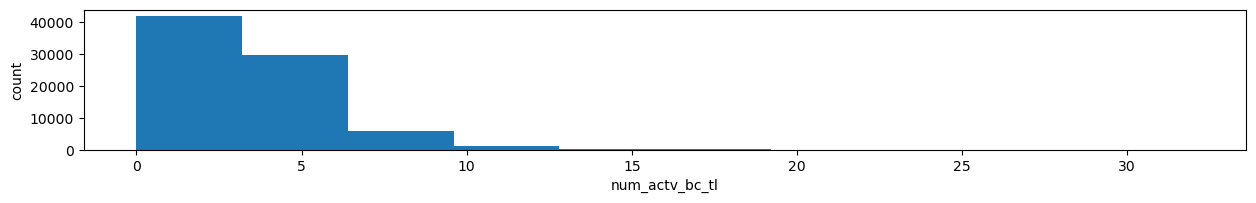

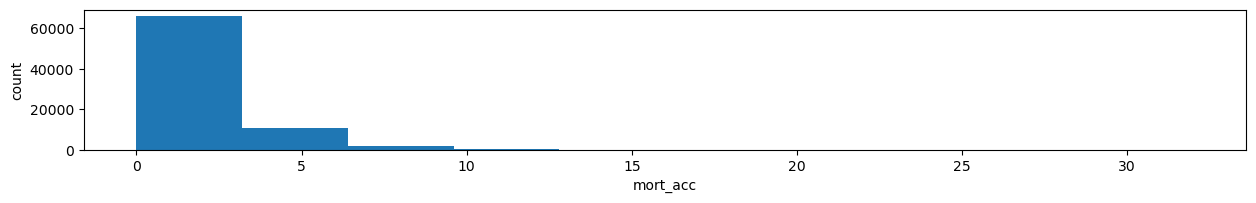

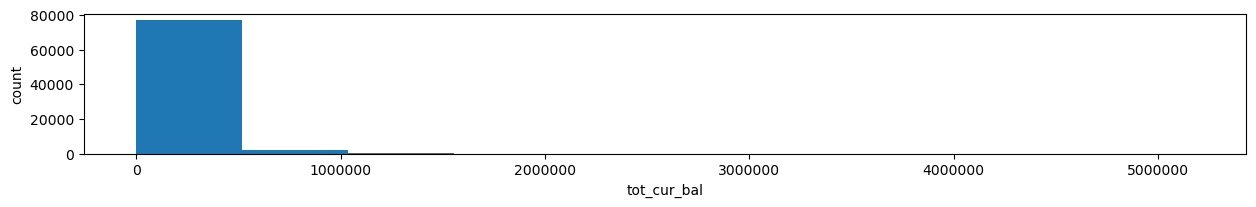

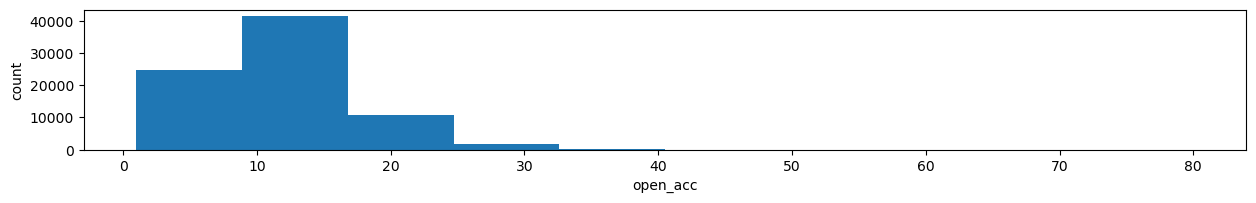

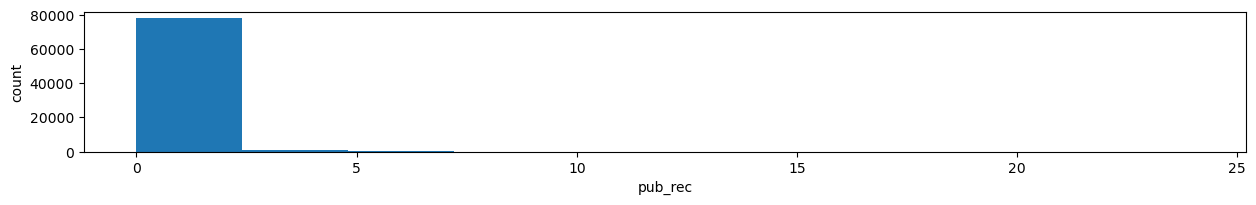

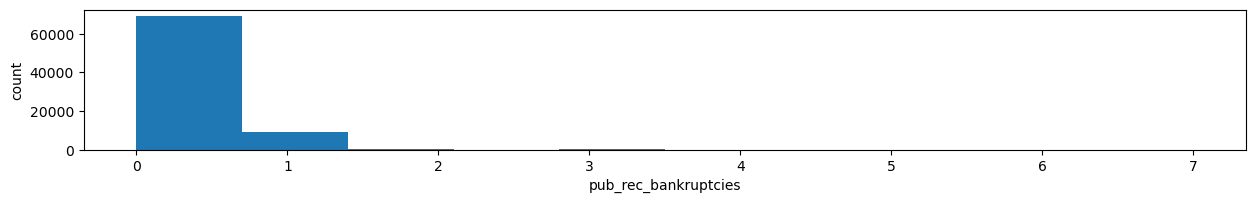

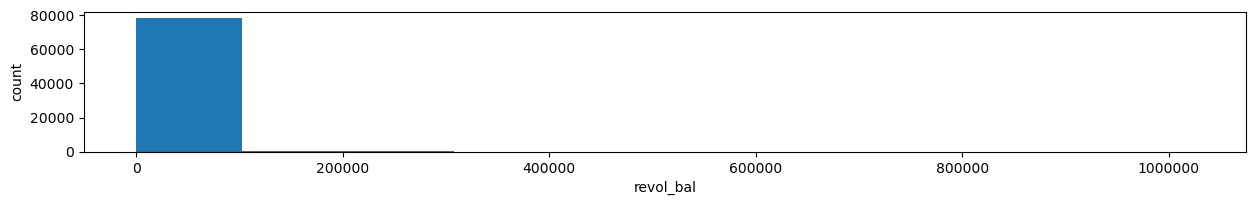

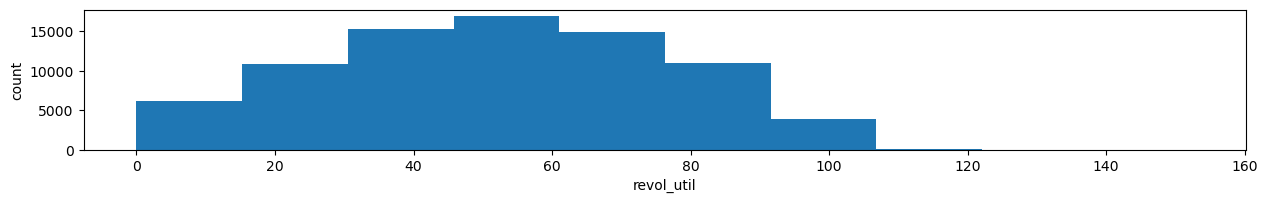

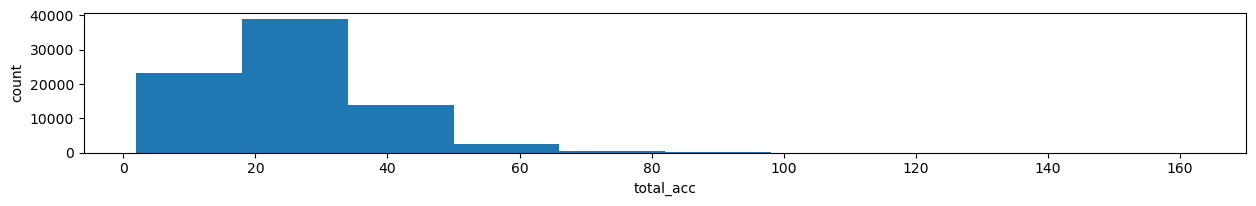

In [16]:
for col in num_cols:
    
    plt.figure(figsize = (15, 4))
    plt.subplot(2, 1,1)
    
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.ticklabel_format(style="plain")
    plt.xlabel(col)


# Multivariate Analysis

annual_inc


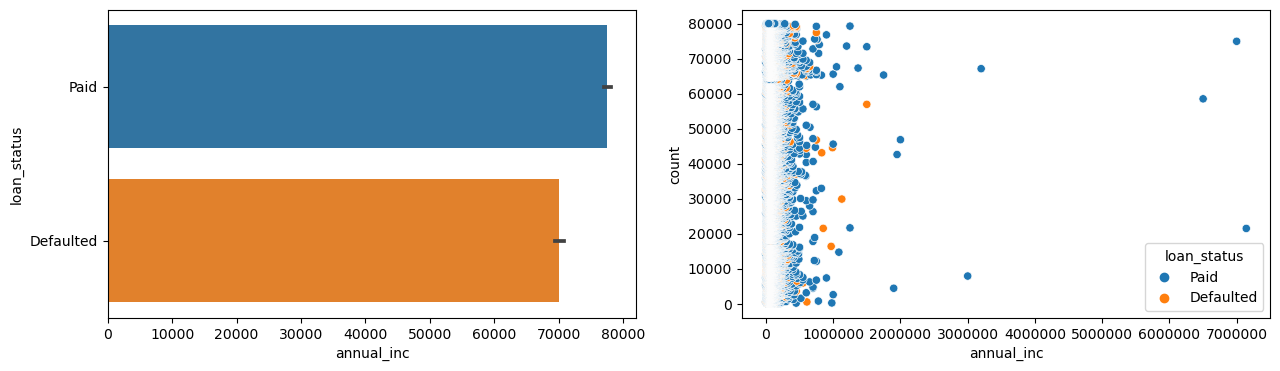

fico_range_high


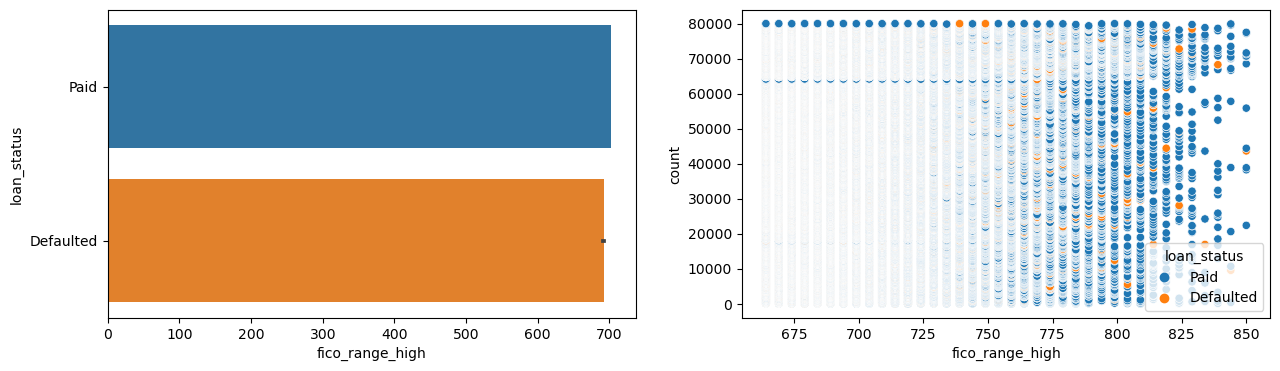

fico_range_low


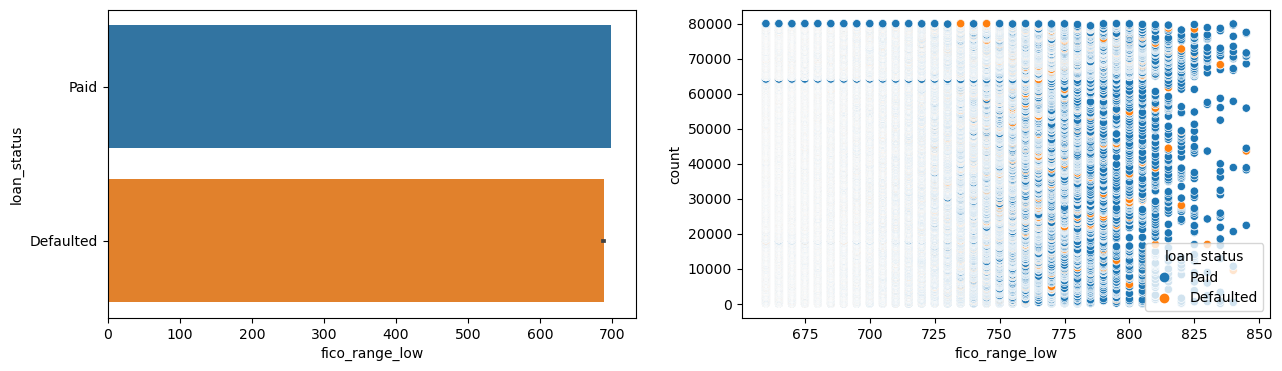

int_rate


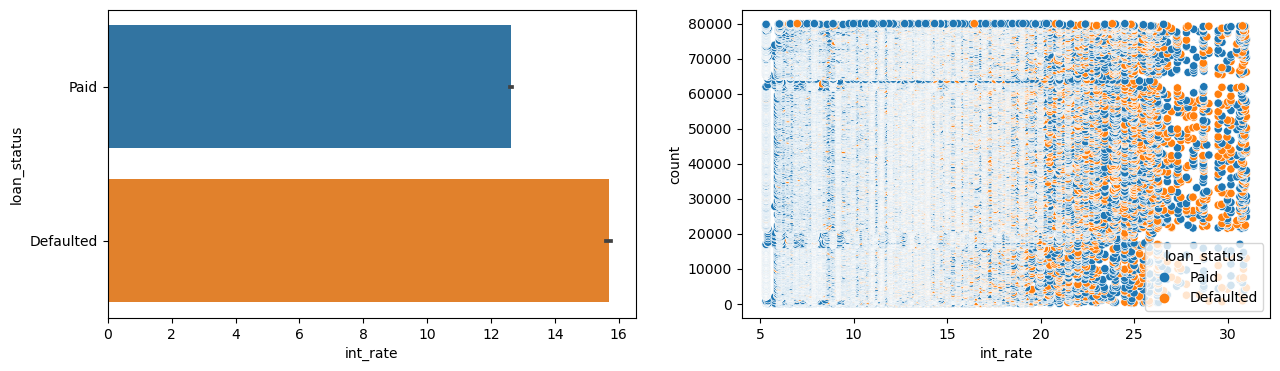

loan_amnt


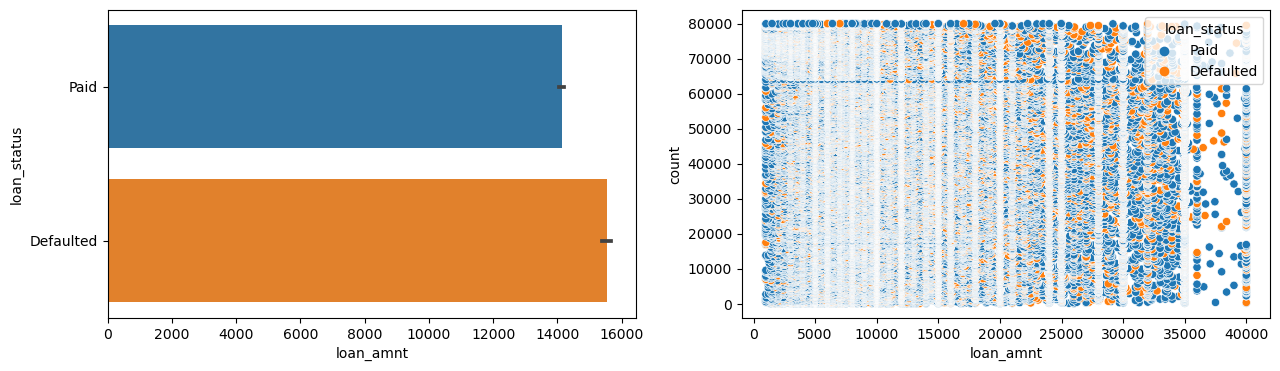

num_actv_bc_tl


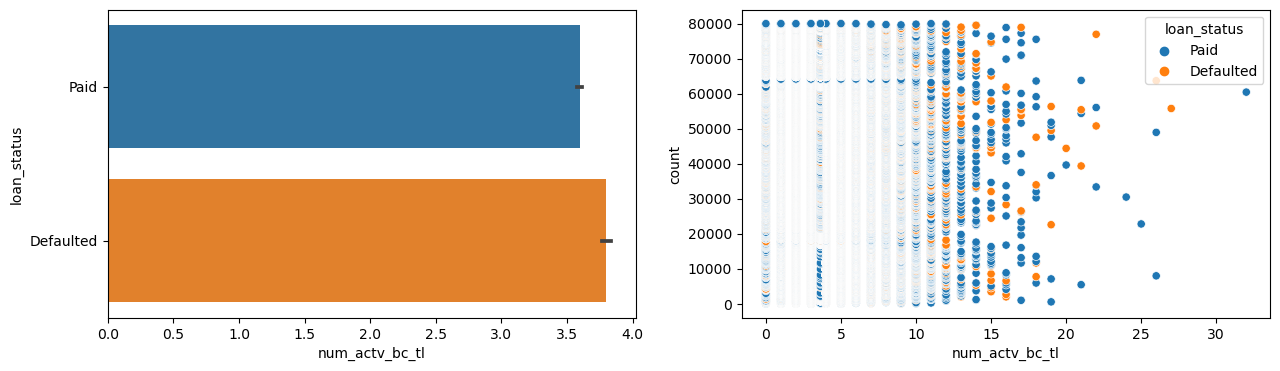

mort_acc


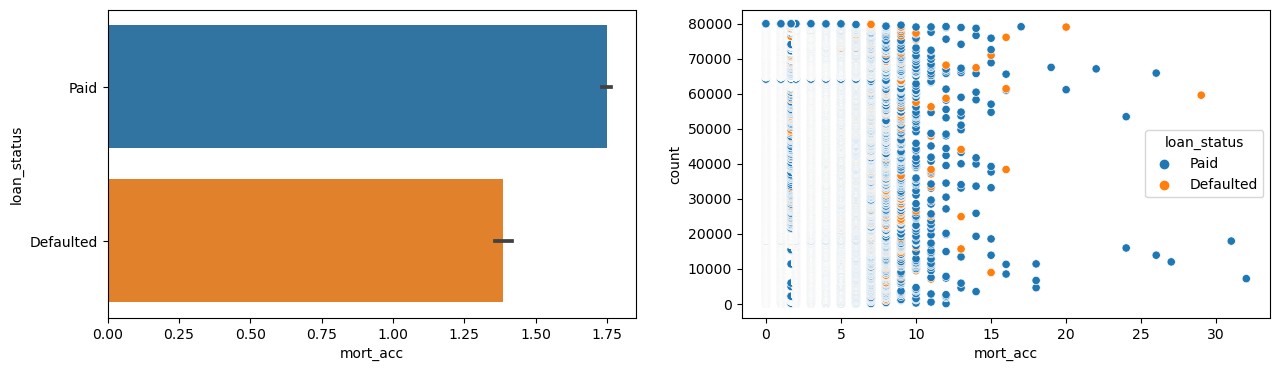

tot_cur_bal


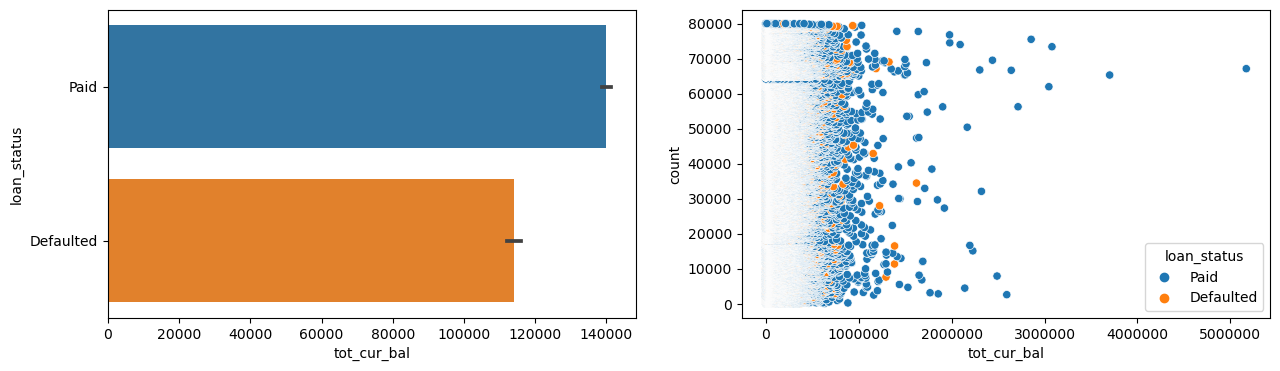

open_acc


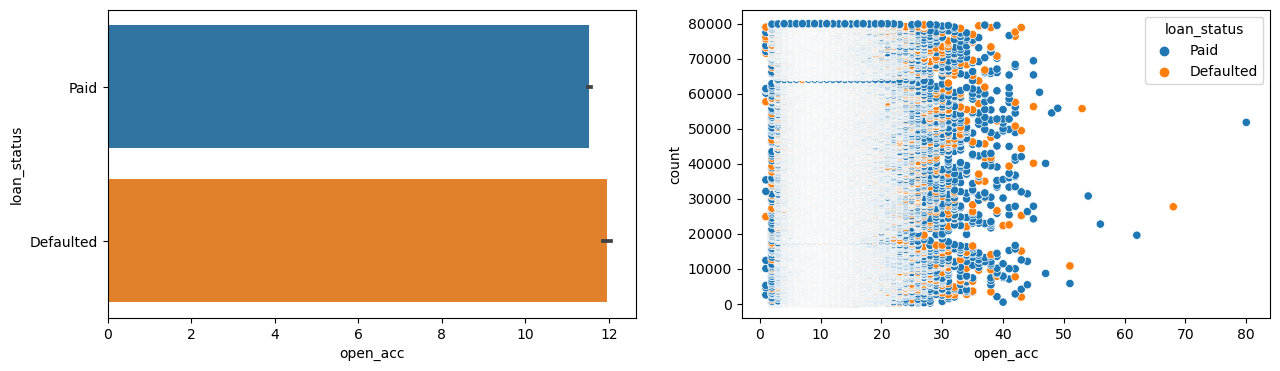

pub_rec


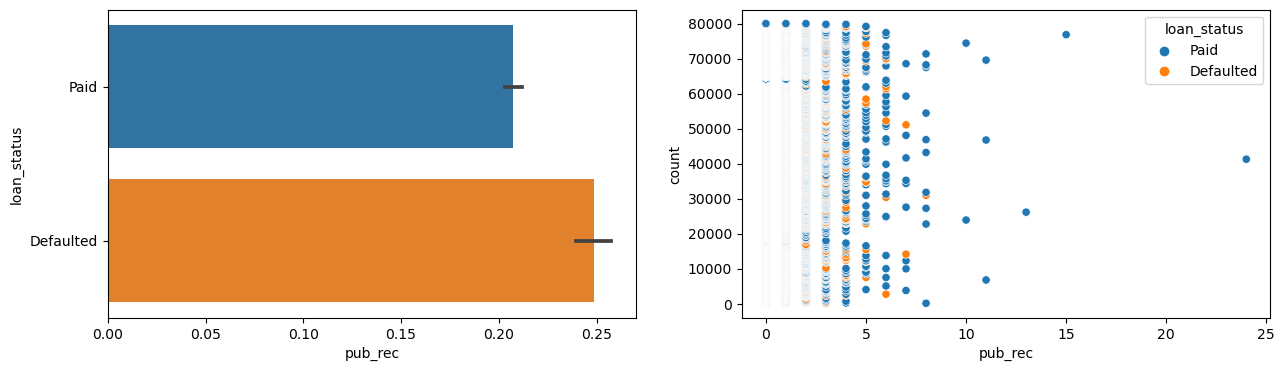

pub_rec_bankruptcies


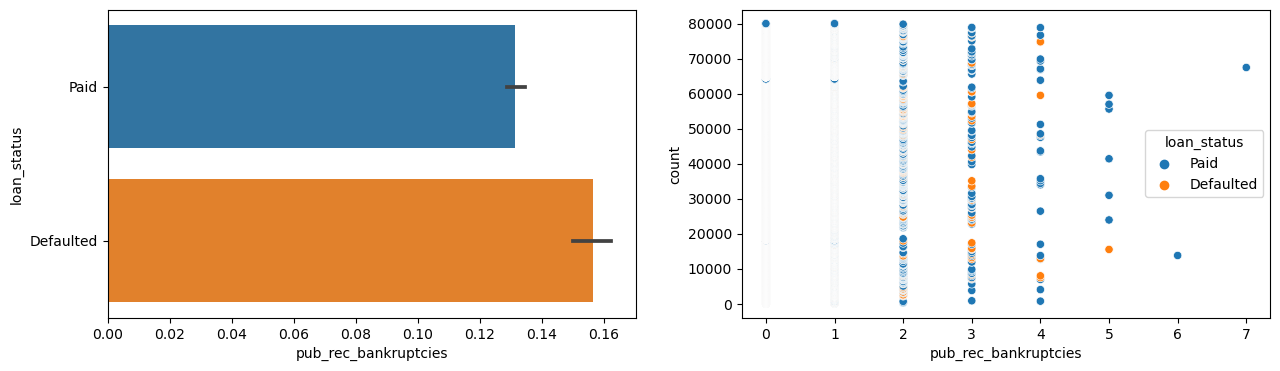

revol_bal


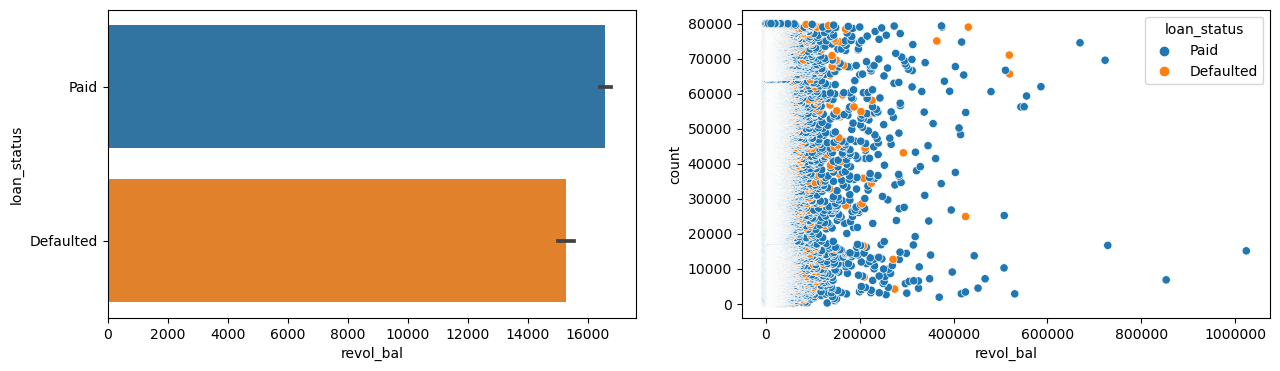

revol_util


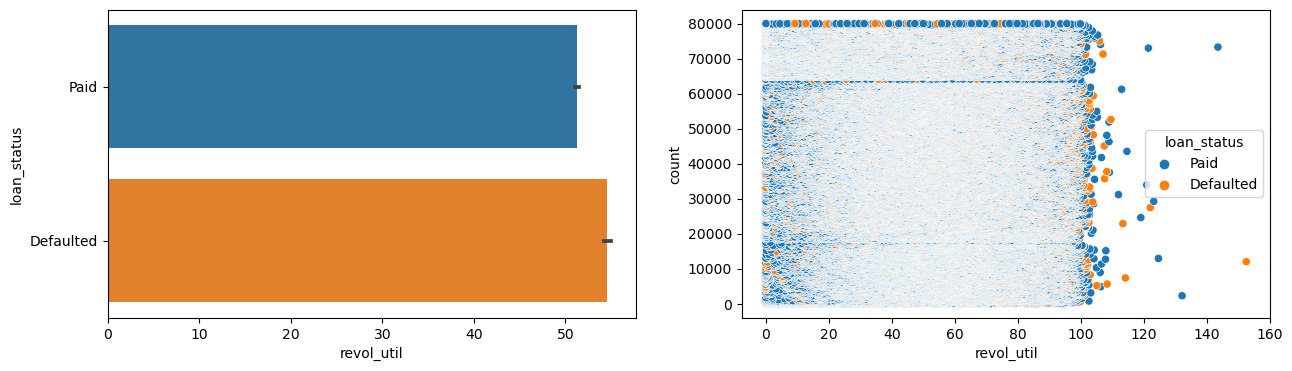

total_acc


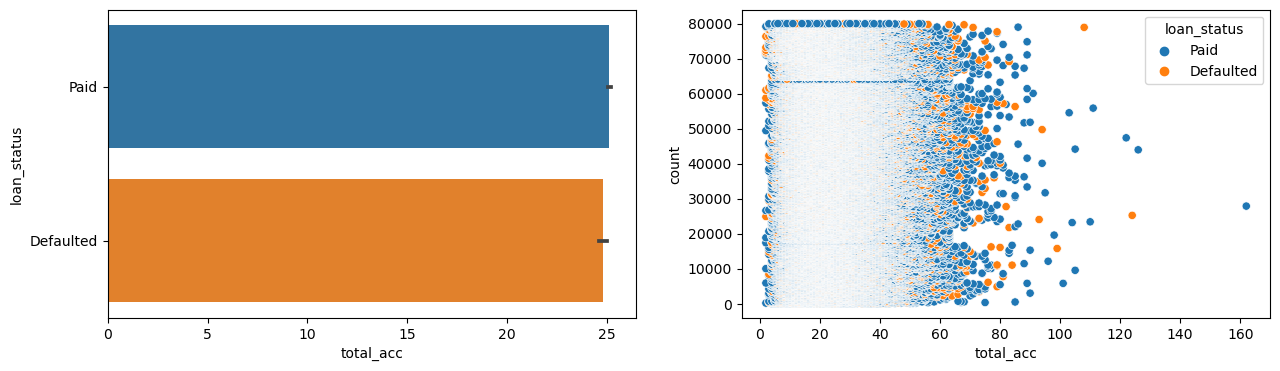

In [17]:
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.barplot(x=df[col], 
                y=df['loan_status']) 
    plt.ylabel('loan_status')
    plt.ticklabel_format(style="plain",axis='x')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.scatterplot(y=df.index,x=df[col],hue=df['loan_status'])
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel(col)
    
    plt.ylabel('count')
    plt.show()
    


In [ ]:
# information from above plots
# 1) dataset has majority data of people who earn less than 20K i will not consider the few data points in the minority as outliers
# 2)people with revol_bal <30000 have taken more loans
# 

In [215]:
cat_cols

NameError: name 'cat_cols' is not defined

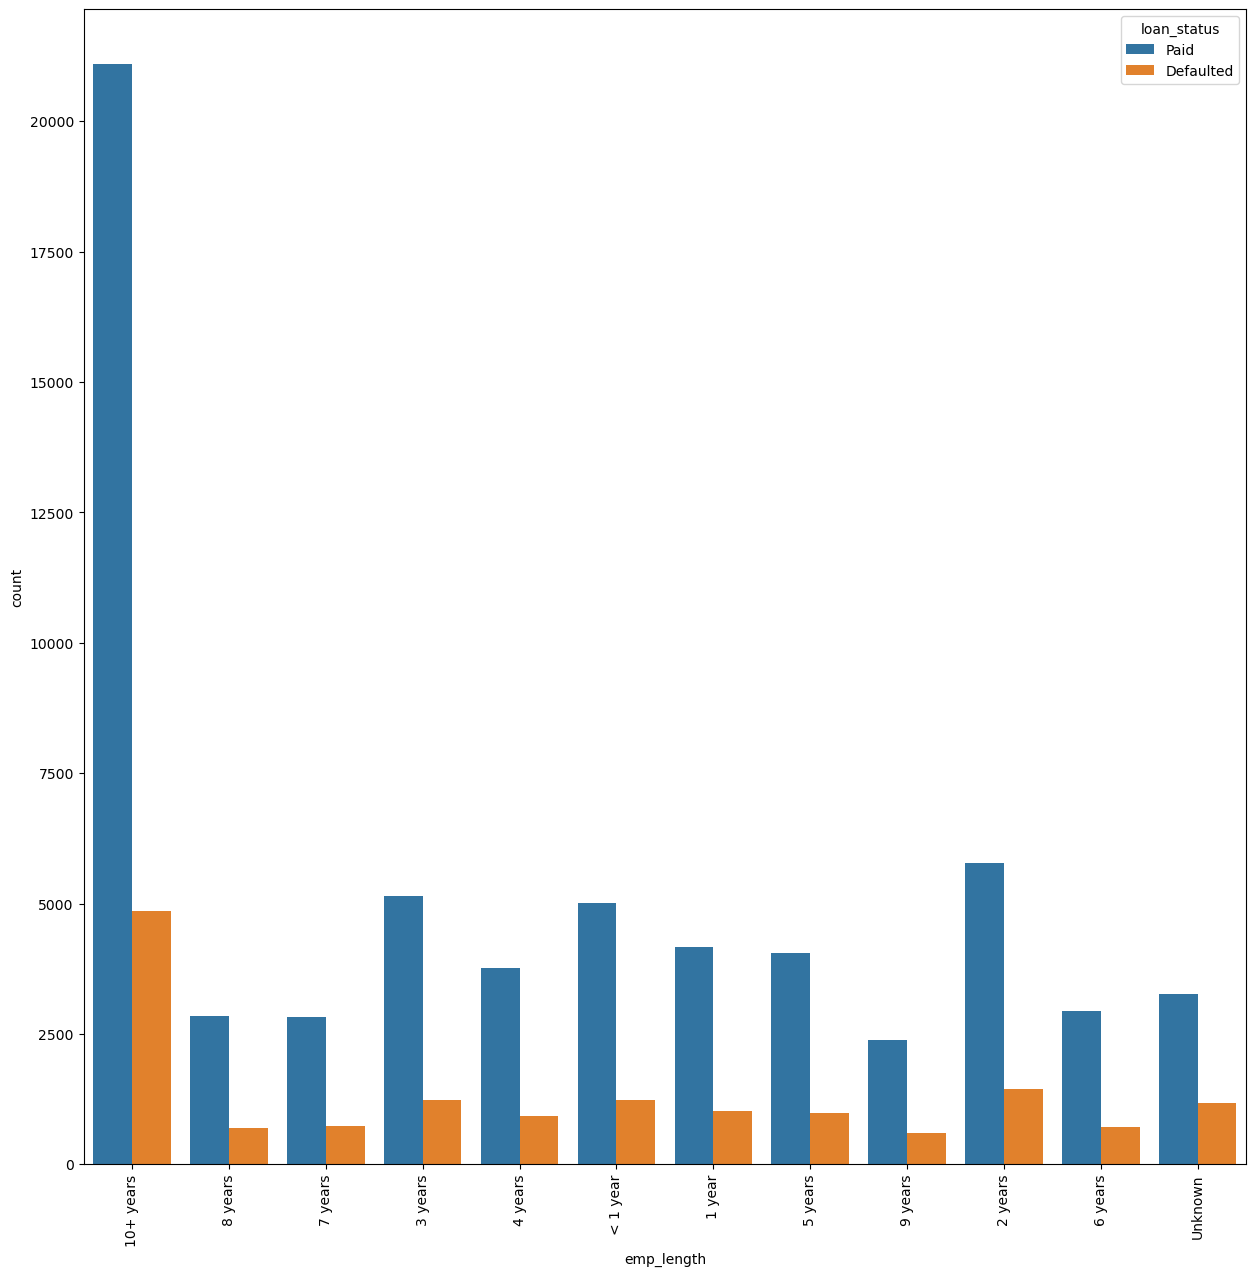

In [18]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['emp_length'],hue='loan_status',data=df) 

plt.xticks(rotation=90)
plt.show()

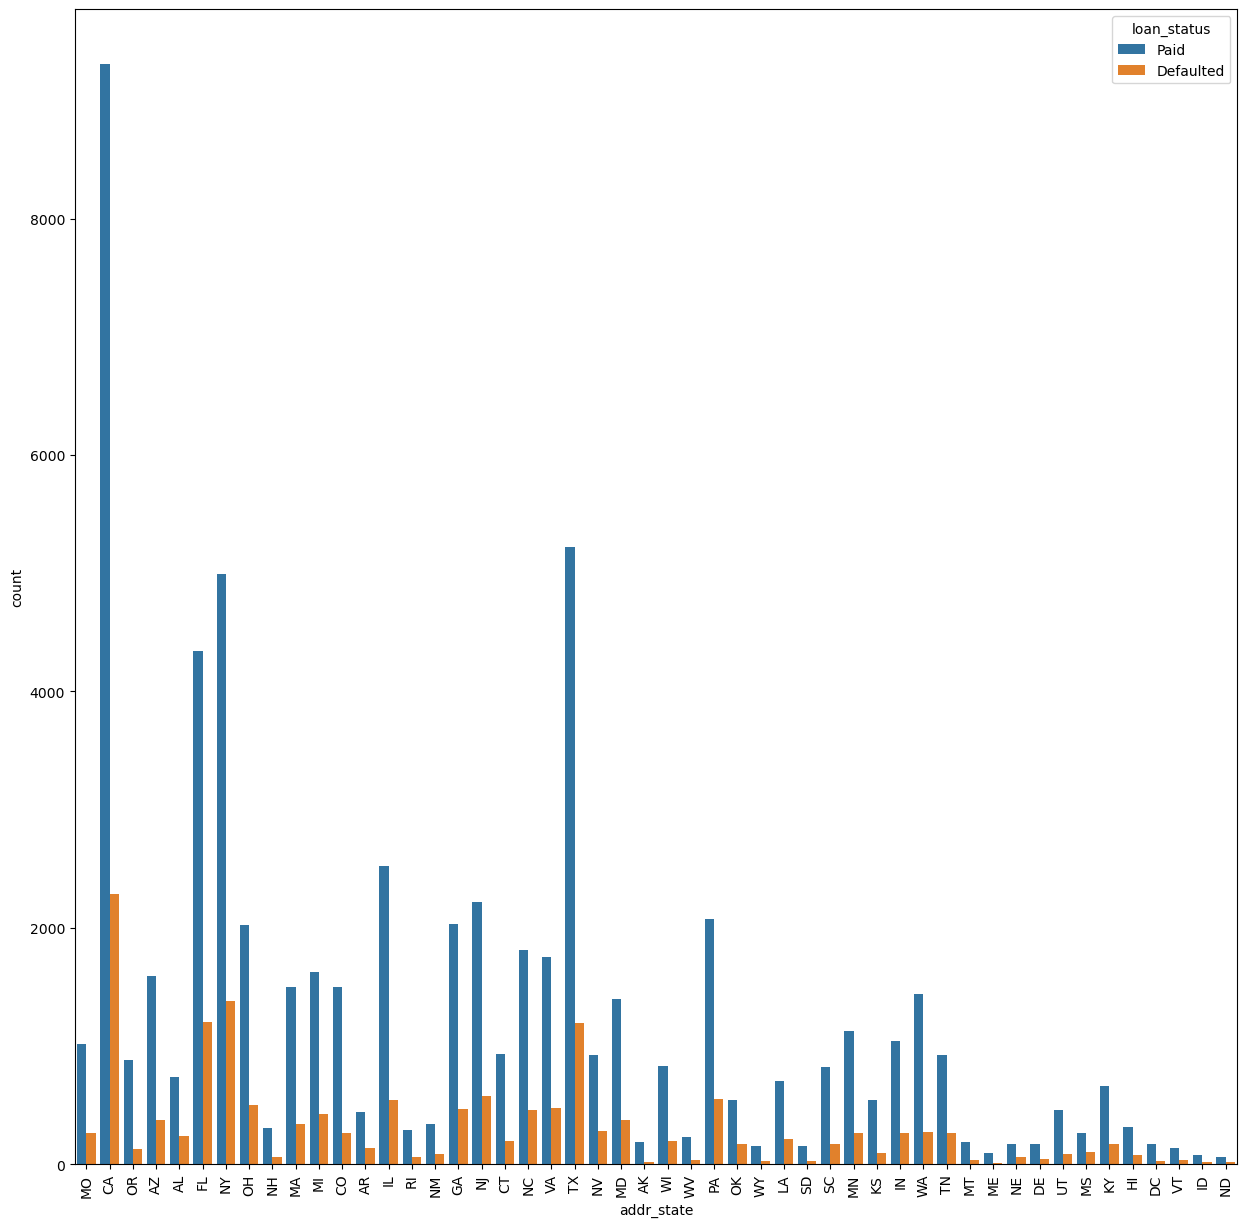

In [19]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['addr_state'],hue='loan_status',data=df) 

plt.xticks(rotation=90)
plt.show()

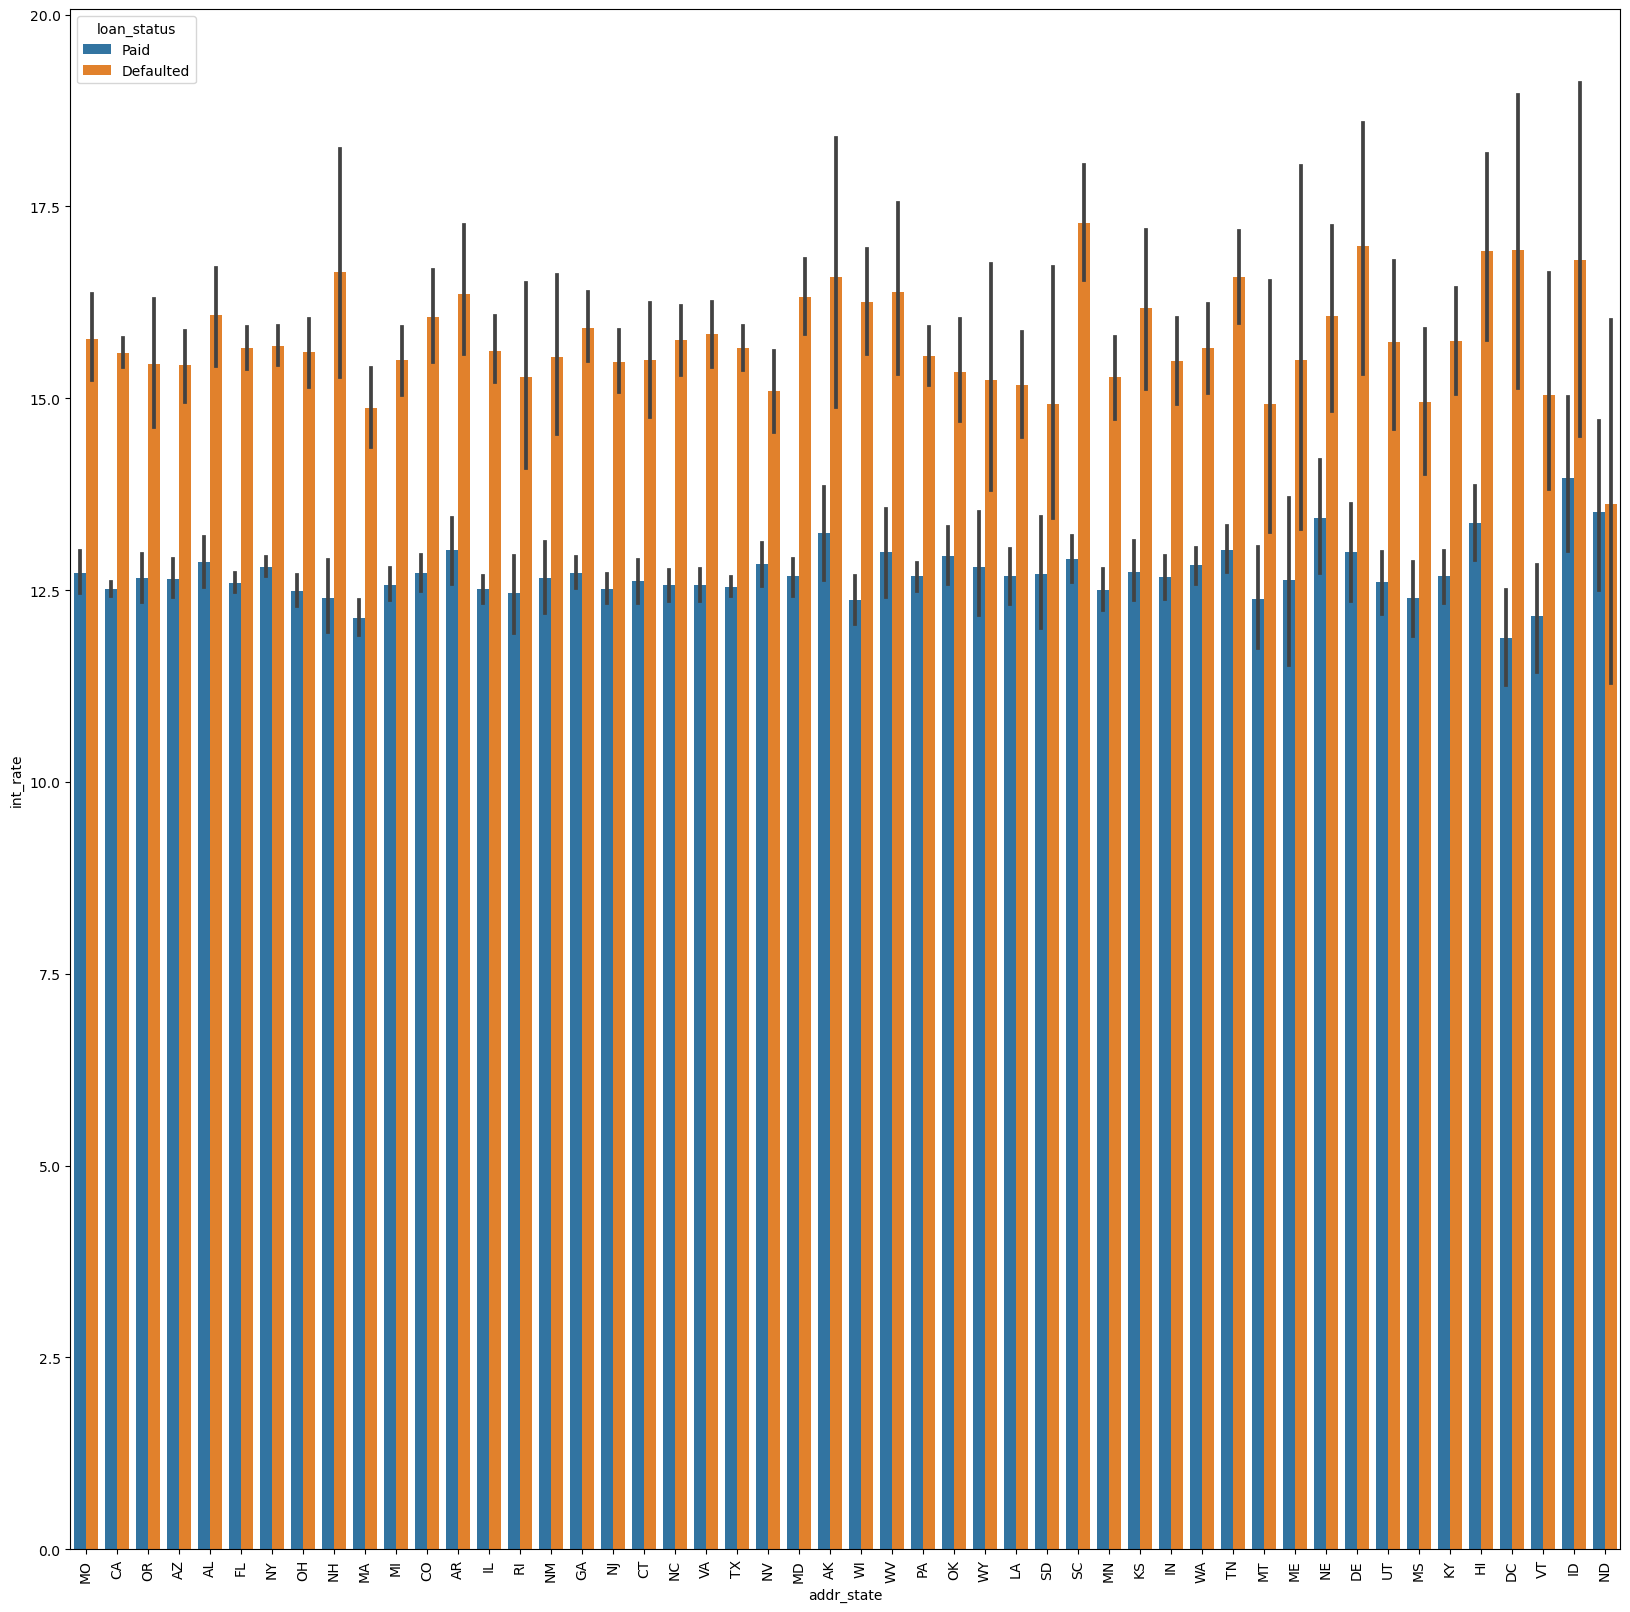

In [20]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['addr_state'],y=df['int_rate'],hue='loan_status',data=df) 

plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.barplot()

In [219]:
cat_cols

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [220]:
num_cols

['annual_inc',
 'fico_range_high',
 'fico_range_low',
 'int_rate',
 'loan_amnt',
 'num_actv_bc_tl',
 'mort_acc',
 'tot_cur_bal',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'revol_bal',
 'revol_util',
 'total_acc']

<Axes: xlabel='grade', ylabel='loan_amnt'>

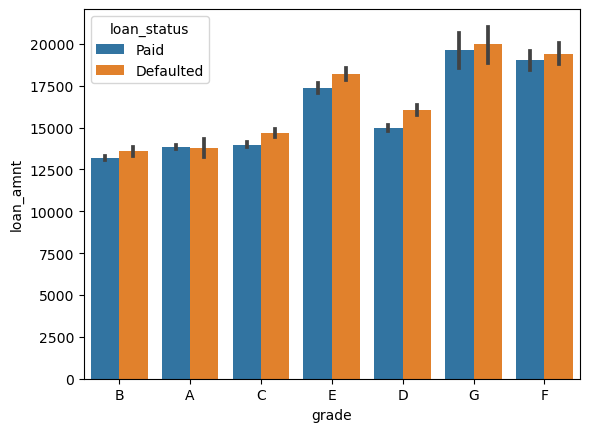

In [231]:
sns.barplot(y=df['loan_amnt'],x=df['grade'],hue=df['loan_status'])

<Axes: xlabel='int_rate', ylabel='Density'>

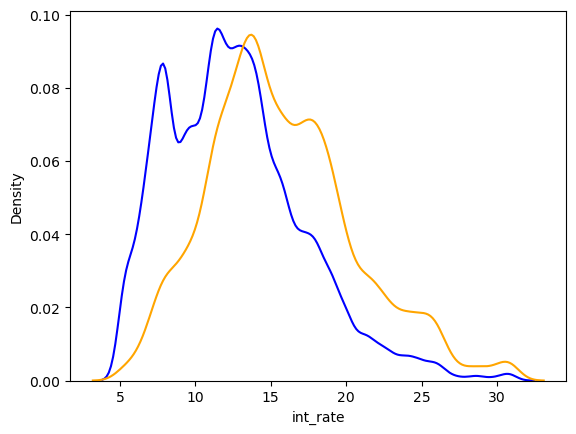

In [255]:
sns.kdeplot(df[df['loan_status'] == "Paid"]['int_rate'],  color='blue') 
sns.kdeplot(df[df['loan_status'] == "Defaulted"]['int_rate'],  color="orange")

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

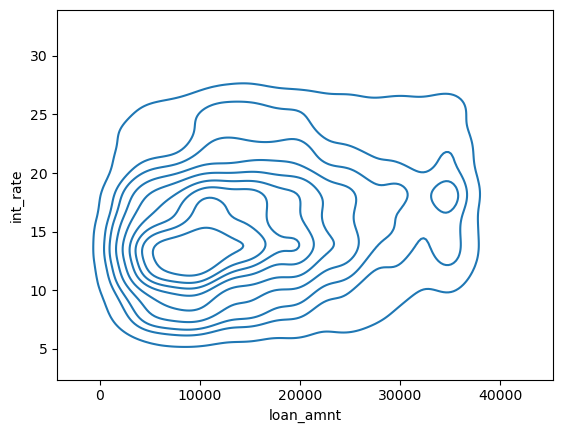

# Outlier Detection


Skew : 41.56


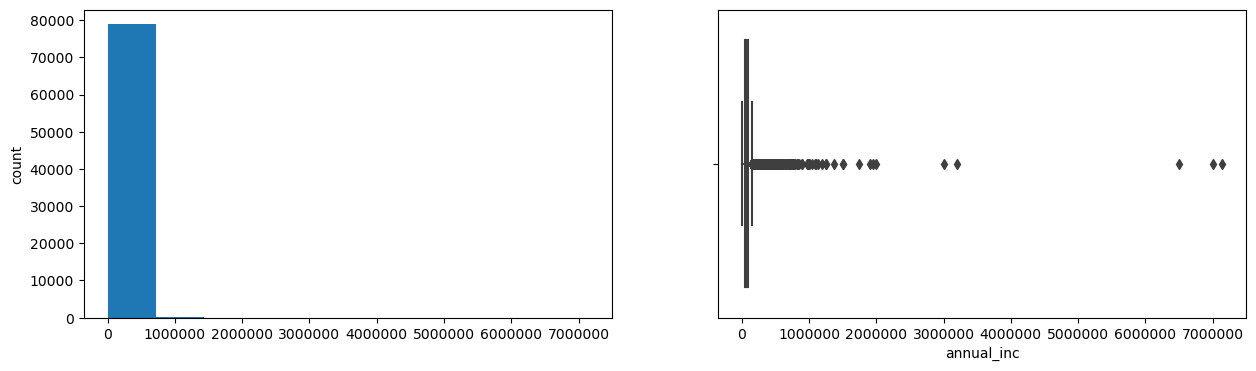

Skew : 1.29


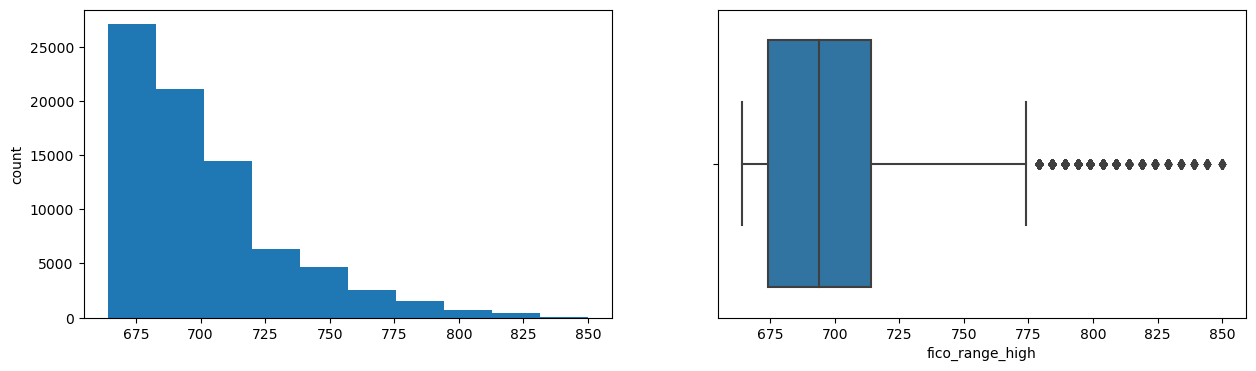

Skew : 1.29


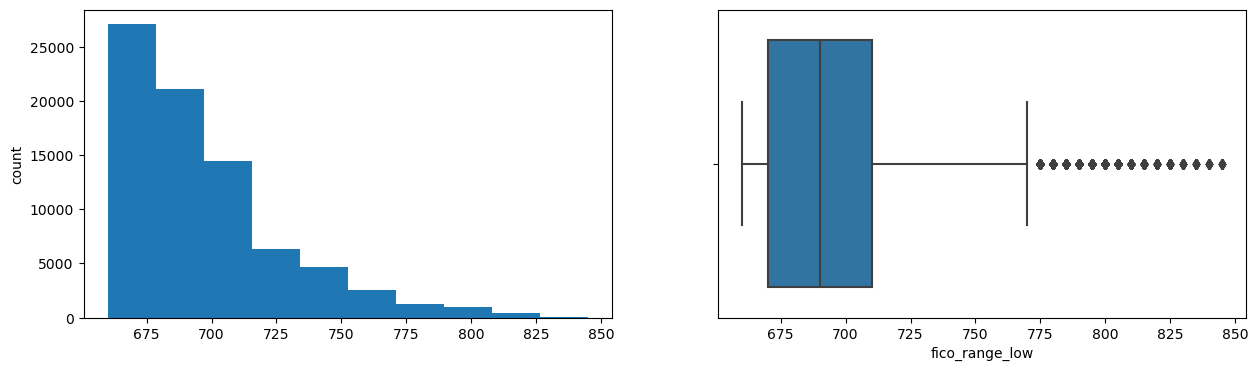

Skew : 0.71


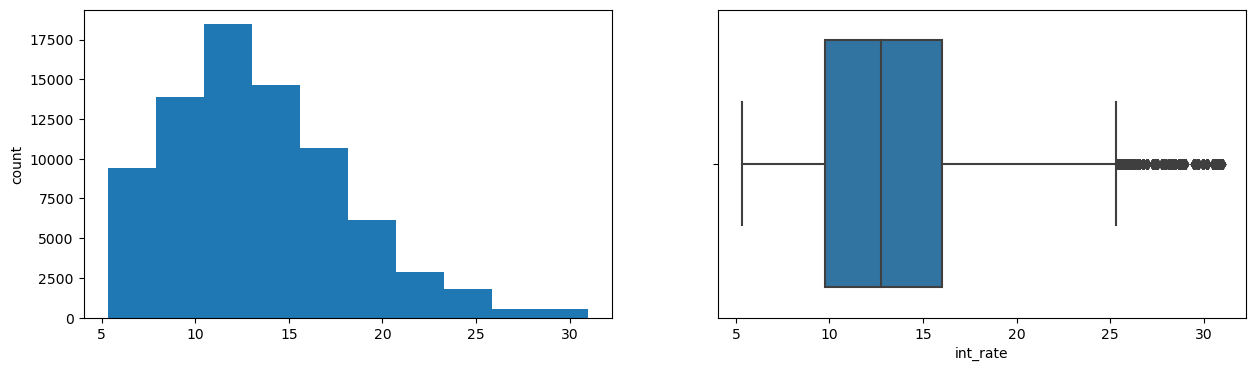

Skew : 0.79


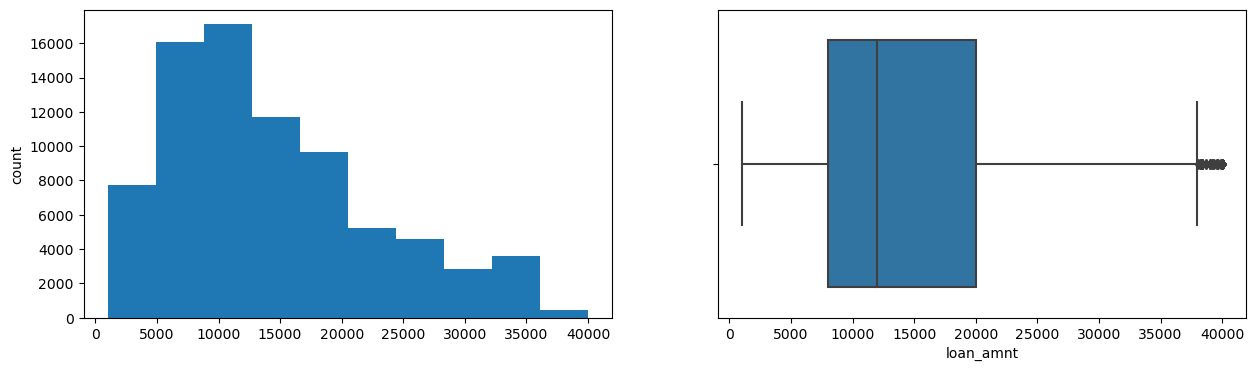

Skew : 1.49


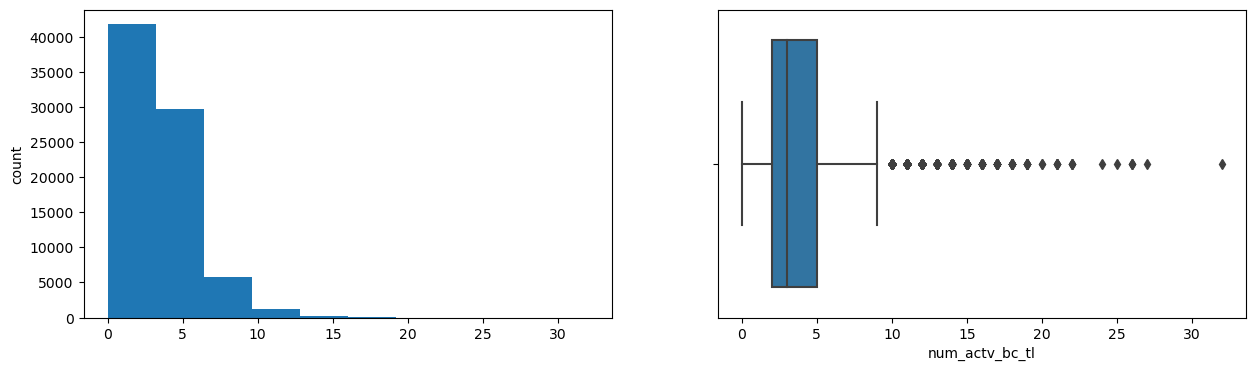

Skew : 1.72


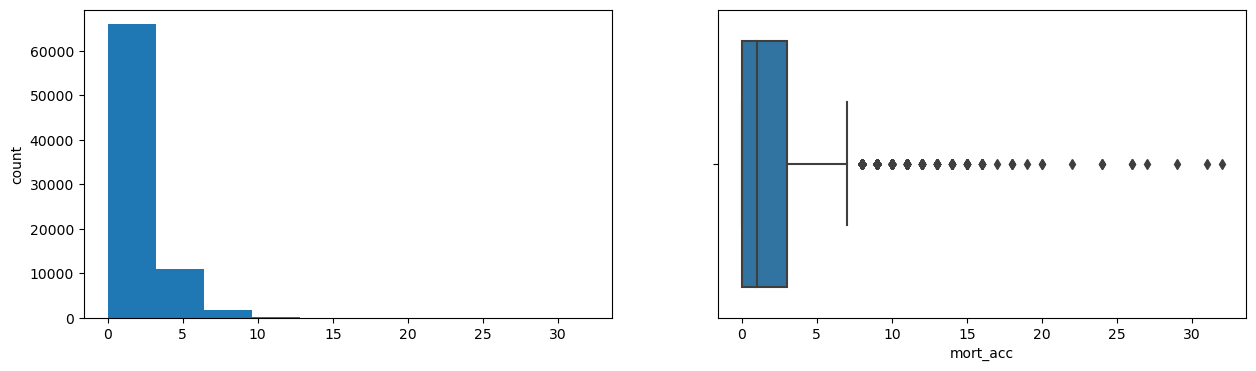

Skew : 3.27


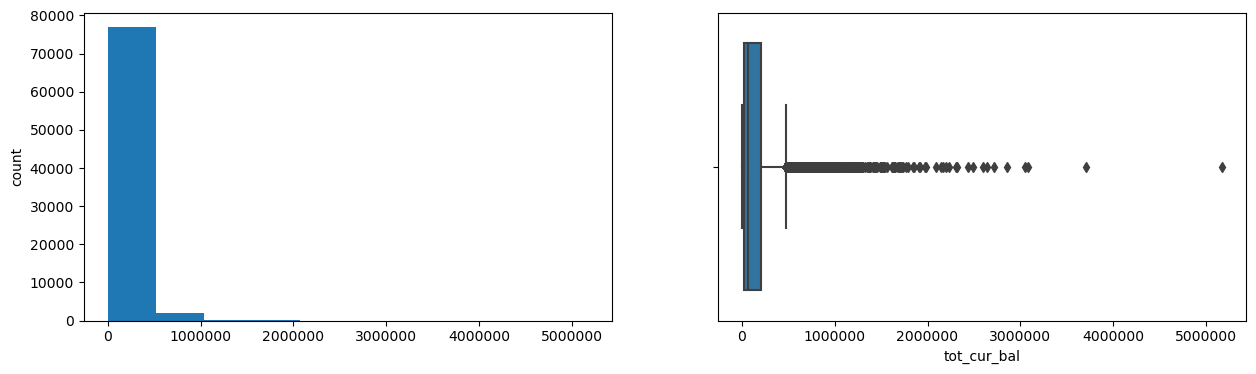

Skew : 1.27


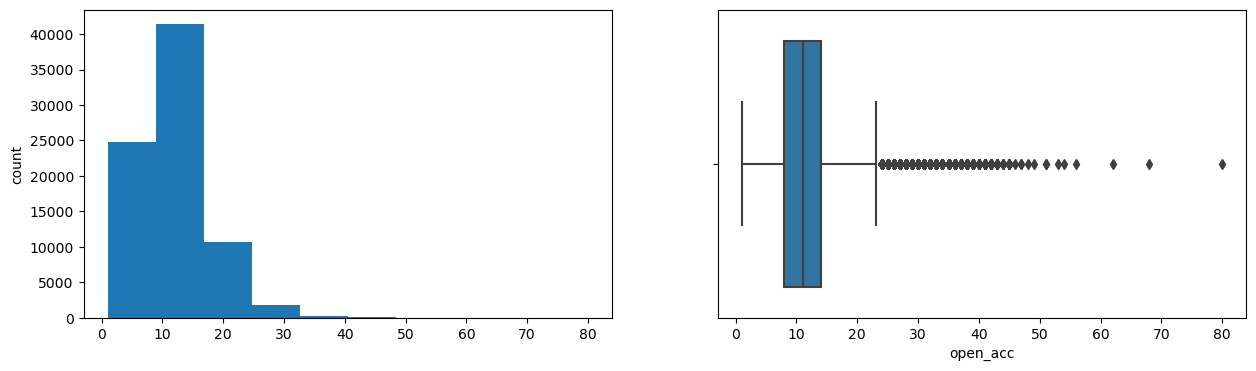

Skew : 5.38


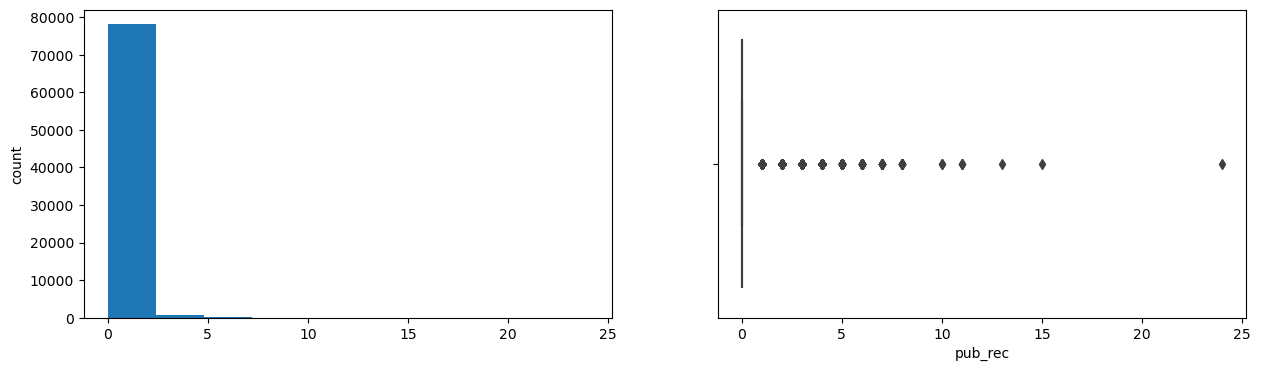

Skew : 3.34


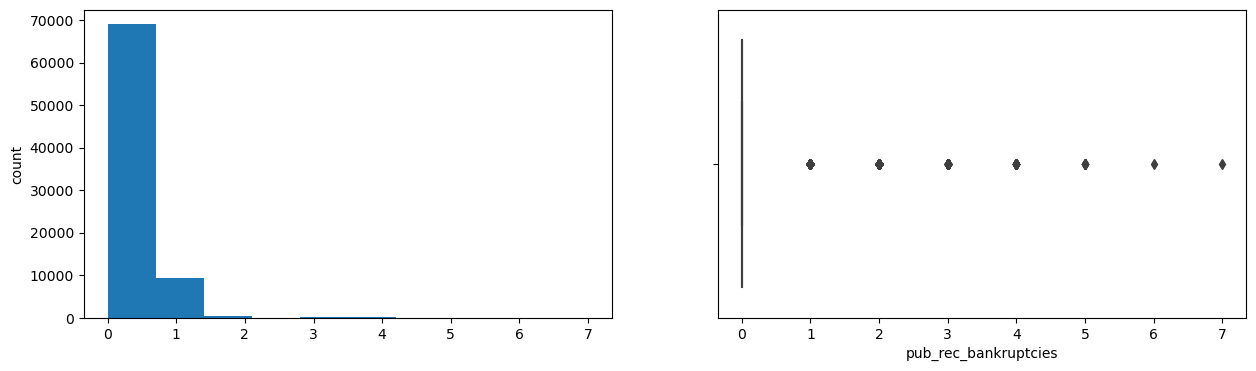

Skew : 9.95


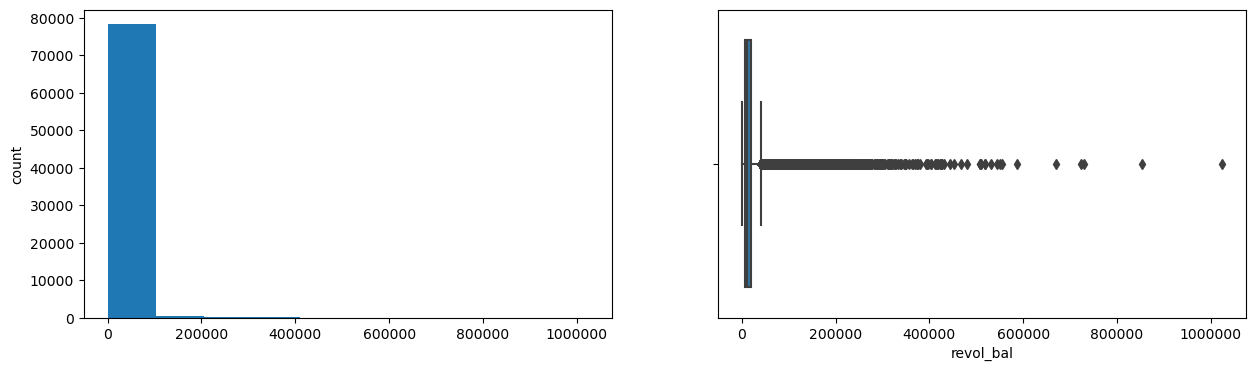

Skew : -0.07


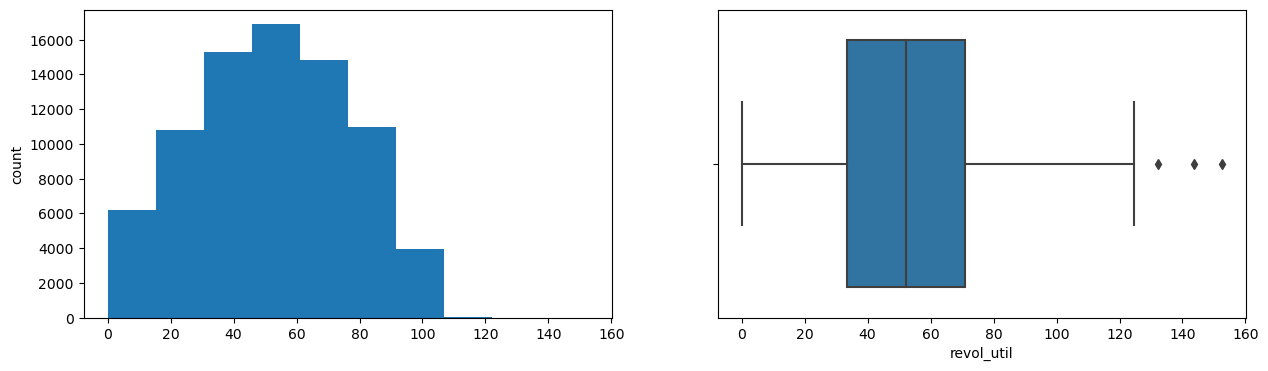

Skew : 0.96


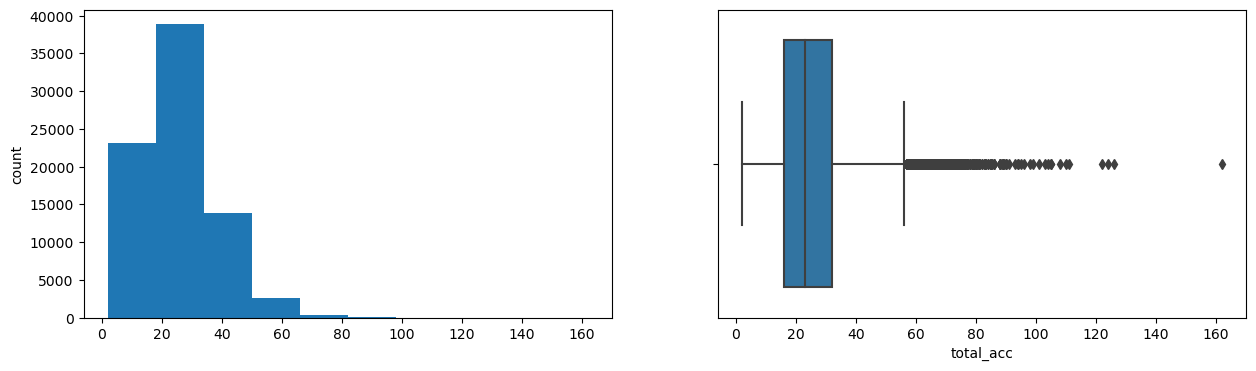

In [21]:

for col in num_cols:
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.ticklabel_format(style="plain")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    
    

In [22]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
       
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return (outliers)# Driver code
for x in num_cols:
    
    sample_outliers = detect_outliers_zscore(df[x])
    print("Outliers from Z-scores method: ", sample_outliers)
    
  


Outliers from Z-scores method:  [450000.0, 980000.0, 609000.0, 300000.0, 780000.0, 408000.0, 330000.0, 336000.0, 520000.0, 310000.0, 290000.0, 350000.0, 325000.0, 400000.0, 420000.0, 1000000.0, 320000.0, 330000.0, 600000.0, 300000.0, 310000.0, 350000.0, 450000.0, 300000.0, 300000.0, 401000.0, 425000.0, 360000.0, 341000.0, 1900000.0, 700000.0, 330000.0, 325000.0, 700000.0, 381000.0, 300000.0, 300000.0, 450000.0, 360000.0, 343000.0, 300000.0, 300000.0, 389000.0, 500000.0, 330000.0, 550000.0, 510000.0, 305000.0, 650000.0, 350000.0, 460000.0, 324000.0, 750000.0, 300000.0, 550000.0, 305000.0, 465154.0, 390000.0, 300000.0, 900000.0, 550000.0, 290000.0, 340000.0, 390000.0, 3000000.0, 300000.0, 450000.0, 500000.0, 285000.0, 400000.0, 450000.0, 300000.0, 400000.0, 300000.0, 445000.0, 400000.0, 312000.0, 350000.0, 290000.0, 300000.0, 310000.0, 405000.0, 325000.0, 300000.0, 350000.0, 300000.0, 350000.0, 305000.0, 360000.0, 450000.0, 290000.0, 300000.0, 290700.0, 750000.0, 300000.0, 720000.0, 2900

Outliers from Z-scores method:  [450000.0, 980000.0, 609000.0, 300000.0, 780000.0, 408000.0, 330000.0, 336000.0, 520000.0, 310000.0, 290000.0, 350000.0, 325000.0, 400000.0, 420000.0, 1000000.0, 320000.0, 330000.0, 600000.0, 300000.0, 310000.0, 350000.0, 450000.0, 300000.0, 300000.0, 401000.0, 425000.0, 360000.0, 341000.0, 1900000.0, 700000.0, 330000.0, 325000.0, 700000.0, 381000.0, 300000.0, 300000.0, 450000.0, 360000.0, 343000.0, 300000.0, 300000.0, 389000.0, 500000.0, 330000.0, 550000.0, 510000.0, 305000.0, 650000.0, 350000.0, 460000.0, 324000.0, 750000.0, 300000.0, 550000.0, 305000.0, 465154.0, 390000.0, 300000.0, 900000.0, 550000.0, 290000.0, 340000.0, 390000.0, 3000000.0, 300000.0, 450000.0, 500000.0, 285000.0, 400000.0, 450000.0, 300000.0, 400000.0, 300000.0, 445000.0, 400000.0, 312000.0, 350000.0, 290000.0, 300000.0, 310000.0, 405000.0, 325000.0, 300000.0, 350000.0, 300000.0, 350000.0, 305000.0, 360000.0, 450000.0, 290000.0, 300000.0, 290700.0, 750000.0, 300000.0, 720000.0, 2900

Outliers from Z-scores method:  [450000.0, 980000.0, 609000.0, 300000.0, 780000.0, 408000.0, 330000.0, 336000.0, 520000.0, 310000.0, 290000.0, 350000.0, 325000.0, 400000.0, 420000.0, 1000000.0, 320000.0, 330000.0, 600000.0, 300000.0, 310000.0, 350000.0, 450000.0, 300000.0, 300000.0, 401000.0, 425000.0, 360000.0, 341000.0, 1900000.0, 700000.0, 330000.0, 325000.0, 700000.0, 381000.0, 300000.0, 300000.0, 450000.0, 360000.0, 343000.0, 300000.0, 300000.0, 389000.0, 500000.0, 330000.0, 550000.0, 510000.0, 305000.0, 650000.0, 350000.0, 460000.0, 324000.0, 750000.0, 300000.0, 550000.0, 305000.0, 465154.0, 390000.0, 300000.0, 900000.0, 550000.0, 290000.0, 340000.0, 390000.0, 3000000.0, 300000.0, 450000.0, 500000.0, 285000.0, 400000.0, 450000.0, 300000.0, 400000.0, 300000.0, 445000.0, 400000.0, 312000.0, 350000.0, 290000.0, 300000.0, 310000.0, 405000.0, 325000.0, 300000.0, 350000.0, 300000.0, 350000.0, 305000.0, 360000.0, 450000.0, 290000.0, 300000.0, 290700.0, 750000.0, 300000.0, 720000.0, 2900

Outliers from Z-scores method:  [450000.0, 980000.0, 609000.0, 300000.0, 780000.0, 408000.0, 330000.0, 336000.0, 520000.0, 310000.0, 290000.0, 350000.0, 325000.0, 400000.0, 420000.0, 1000000.0, 320000.0, 330000.0, 600000.0, 300000.0, 310000.0, 350000.0, 450000.0, 300000.0, 300000.0, 401000.0, 425000.0, 360000.0, 341000.0, 1900000.0, 700000.0, 330000.0, 325000.0, 700000.0, 381000.0, 300000.0, 300000.0, 450000.0, 360000.0, 343000.0, 300000.0, 300000.0, 389000.0, 500000.0, 330000.0, 550000.0, 510000.0, 305000.0, 650000.0, 350000.0, 460000.0, 324000.0, 750000.0, 300000.0, 550000.0, 305000.0, 465154.0, 390000.0, 300000.0, 900000.0, 550000.0, 290000.0, 340000.0, 390000.0, 3000000.0, 300000.0, 450000.0, 500000.0, 285000.0, 400000.0, 450000.0, 300000.0, 400000.0, 300000.0, 445000.0, 400000.0, 312000.0, 350000.0, 290000.0, 300000.0, 310000.0, 405000.0, 325000.0, 300000.0, 350000.0, 300000.0, 350000.0, 305000.0, 360000.0, 450000.0, 290000.0, 300000.0, 290700.0, 750000.0, 300000.0, 720000.0, 2900

Outliers from Z-scores method:  [450000.0, 980000.0, 609000.0, 300000.0, 780000.0, 408000.0, 330000.0, 336000.0, 520000.0, 310000.0, 290000.0, 350000.0, 325000.0, 400000.0, 420000.0, 1000000.0, 320000.0, 330000.0, 600000.0, 300000.0, 310000.0, 350000.0, 450000.0, 300000.0, 300000.0, 401000.0, 425000.0, 360000.0, 341000.0, 1900000.0, 700000.0, 330000.0, 325000.0, 700000.0, 381000.0, 300000.0, 300000.0, 450000.0, 360000.0, 343000.0, 300000.0, 300000.0, 389000.0, 500000.0, 330000.0, 550000.0, 510000.0, 305000.0, 650000.0, 350000.0, 460000.0, 324000.0, 750000.0, 300000.0, 550000.0, 305000.0, 465154.0, 390000.0, 300000.0, 900000.0, 550000.0, 290000.0, 340000.0, 390000.0, 3000000.0, 300000.0, 450000.0, 500000.0, 285000.0, 400000.0, 450000.0, 300000.0, 400000.0, 300000.0, 445000.0, 400000.0, 312000.0, 350000.0, 290000.0, 300000.0, 310000.0, 405000.0, 325000.0, 300000.0, 350000.0, 300000.0, 350000.0, 305000.0, 360000.0, 450000.0, 290000.0, 300000.0, 290700.0, 750000.0, 300000.0, 720000.0, 2900

Outliers from Z-scores method:  [450000.0, 980000.0, 609000.0, 300000.0, 780000.0, 408000.0, 330000.0, 336000.0, 520000.0, 310000.0, 290000.0, 350000.0, 325000.0, 400000.0, 420000.0, 1000000.0, 320000.0, 330000.0, 600000.0, 300000.0, 310000.0, 350000.0, 450000.0, 300000.0, 300000.0, 401000.0, 425000.0, 360000.0, 341000.0, 1900000.0, 700000.0, 330000.0, 325000.0, 700000.0, 381000.0, 300000.0, 300000.0, 450000.0, 360000.0, 343000.0, 300000.0, 300000.0, 389000.0, 500000.0, 330000.0, 550000.0, 510000.0, 305000.0, 650000.0, 350000.0, 460000.0, 324000.0, 750000.0, 300000.0, 550000.0, 305000.0, 465154.0, 390000.0, 300000.0, 900000.0, 550000.0, 290000.0, 340000.0, 390000.0, 3000000.0, 300000.0, 450000.0, 500000.0, 285000.0, 400000.0, 450000.0, 300000.0, 400000.0, 300000.0, 445000.0, 400000.0, 312000.0, 350000.0, 290000.0, 300000.0, 310000.0, 405000.0, 325000.0, 300000.0, 350000.0, 300000.0, 350000.0, 305000.0, 360000.0, 450000.0, 290000.0, 300000.0, 290700.0, 750000.0, 300000.0, 720000.0, 2900

Outliers from Z-scores method:  [450000.0, 980000.0, 609000.0, 300000.0, 780000.0, 408000.0, 330000.0, 336000.0, 520000.0, 310000.0, 290000.0, 350000.0, 325000.0, 400000.0, 420000.0, 1000000.0, 320000.0, 330000.0, 600000.0, 300000.0, 310000.0, 350000.0, 450000.0, 300000.0, 300000.0, 401000.0, 425000.0, 360000.0, 341000.0, 1900000.0, 700000.0, 330000.0, 325000.0, 700000.0, 381000.0, 300000.0, 300000.0, 450000.0, 360000.0, 343000.0, 300000.0, 300000.0, 389000.0, 500000.0, 330000.0, 550000.0, 510000.0, 305000.0, 650000.0, 350000.0, 460000.0, 324000.0, 750000.0, 300000.0, 550000.0, 305000.0, 465154.0, 390000.0, 300000.0, 900000.0, 550000.0, 290000.0, 340000.0, 390000.0, 3000000.0, 300000.0, 450000.0, 500000.0, 285000.0, 400000.0, 450000.0, 300000.0, 400000.0, 300000.0, 445000.0, 400000.0, 312000.0, 350000.0, 290000.0, 300000.0, 310000.0, 405000.0, 325000.0, 300000.0, 350000.0, 300000.0, 350000.0, 305000.0, 360000.0, 450000.0, 290000.0, 300000.0, 290700.0, 750000.0, 300000.0, 720000.0, 2900

{'whiskers': [<matplotlib.lines.Line2D at 0x1a395a67490>,
 'caps': [<matplotlib.lines.Line2D at 0x1a395a69150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3f2a21a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a395a6a7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a395a69b50>],
 'means': []}

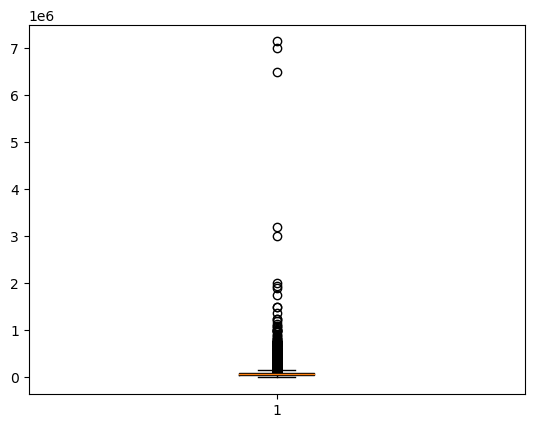

In [212]:
plt.boxplot(df['annual_inc'])

In [ ]:
df.corr(numeric_only=True)['loan_status']

In [ ]:
df.info()

In [93]:
encoder=LabelEncoder()
df['loan_status'] = encoder.fit_transform(df['loan_status'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78947 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            78947 non-null  object 
 1   annual_inc            78947 non-null  float64
 2   earliest_cr_line      78947 non-null  object 
 3   emp_length            78947 non-null  object 
 4   emp_title             78947 non-null  object 
 5   fico_range_high       78947 non-null  int64  
 6   fico_range_low        78947 non-null  int64  
 7   grade                 78947 non-null  object 
 8   home_ownership        78947 non-null  object 
 9   application_type      78947 non-null  object 
 10  initial_list_status   78947 non-null  object 
 11  int_rate              78947 non-null  float64
 12  loan_amnt             78947 non-null  int64  
 13  num_actv_bc_tl        78947 non-null  float64
 14  mort_acc              78947 non-null  float64
 15  tot_cur_bal           78

In [95]:
df.corr(numeric_only=True)['loan_status']

annual_inc              0.042968
fico_range_high         0.127777
fico_range_low          0.127779
int_rate               -0.255499
loan_amnt              -0.064607
num_actv_bc_tl         -0.036859
mort_acc                0.073366
tot_cur_bal             0.065391
open_acc               -0.030396
pub_rec                -0.028541
pub_rec_bankruptcies   -0.026033
revol_bal               0.023046
revol_util             -0.054176
total_acc               0.010337
loan_status             1.000000
Name: loan_status, dtype: float64

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

In [13]:
df['fico_avg']=(df['fico_range_high']+df['fico_range_low'])/2
df.drop(columns=['fico_range_low','fico_range_high'],inplace=True)

In [146]:
#used_loan_amt
df['used_loan_amt']=(df['revol_util']/100)*df['revol_bal']

In [ ]:
df['used_loan_amt']

In [147]:
#Debt_To_Income_ratio
round((df['loan_amnt'] /df['annual_inc'])*100,2)

0             3.60
1             1.75
2            10.00
3             3.33
4            12.97
5             7.04
6             8.62
7             8.42
8             5.78
9             9.12
10            6.20
11           10.61
12           18.46
13            8.40
14           18.46
15            7.37
16           22.08
17            6.90
18            7.84
19           16.00
20           16.88
21            6.25
22           18.62
23           13.25
24           13.66
25            6.06
26           14.29
27            7.96
28           24.00
29            9.00
30           23.33
31            6.54
32           11.00
33            9.71
34           11.86
35           11.28
36           30.77
37           26.32
38           23.08
39           13.60
40           13.64
41           26.53
42           28.57
43           12.58
44           13.33
45           10.00
46           25.91
47           36.67
48           22.11
49           32.00
50            4.05
51            6.67
52          

In [167]:
df['Interest_income']=df["loan_amnt"]*df['int_rate']

In [ ]:
df[['total_acc','open_acc']]

C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


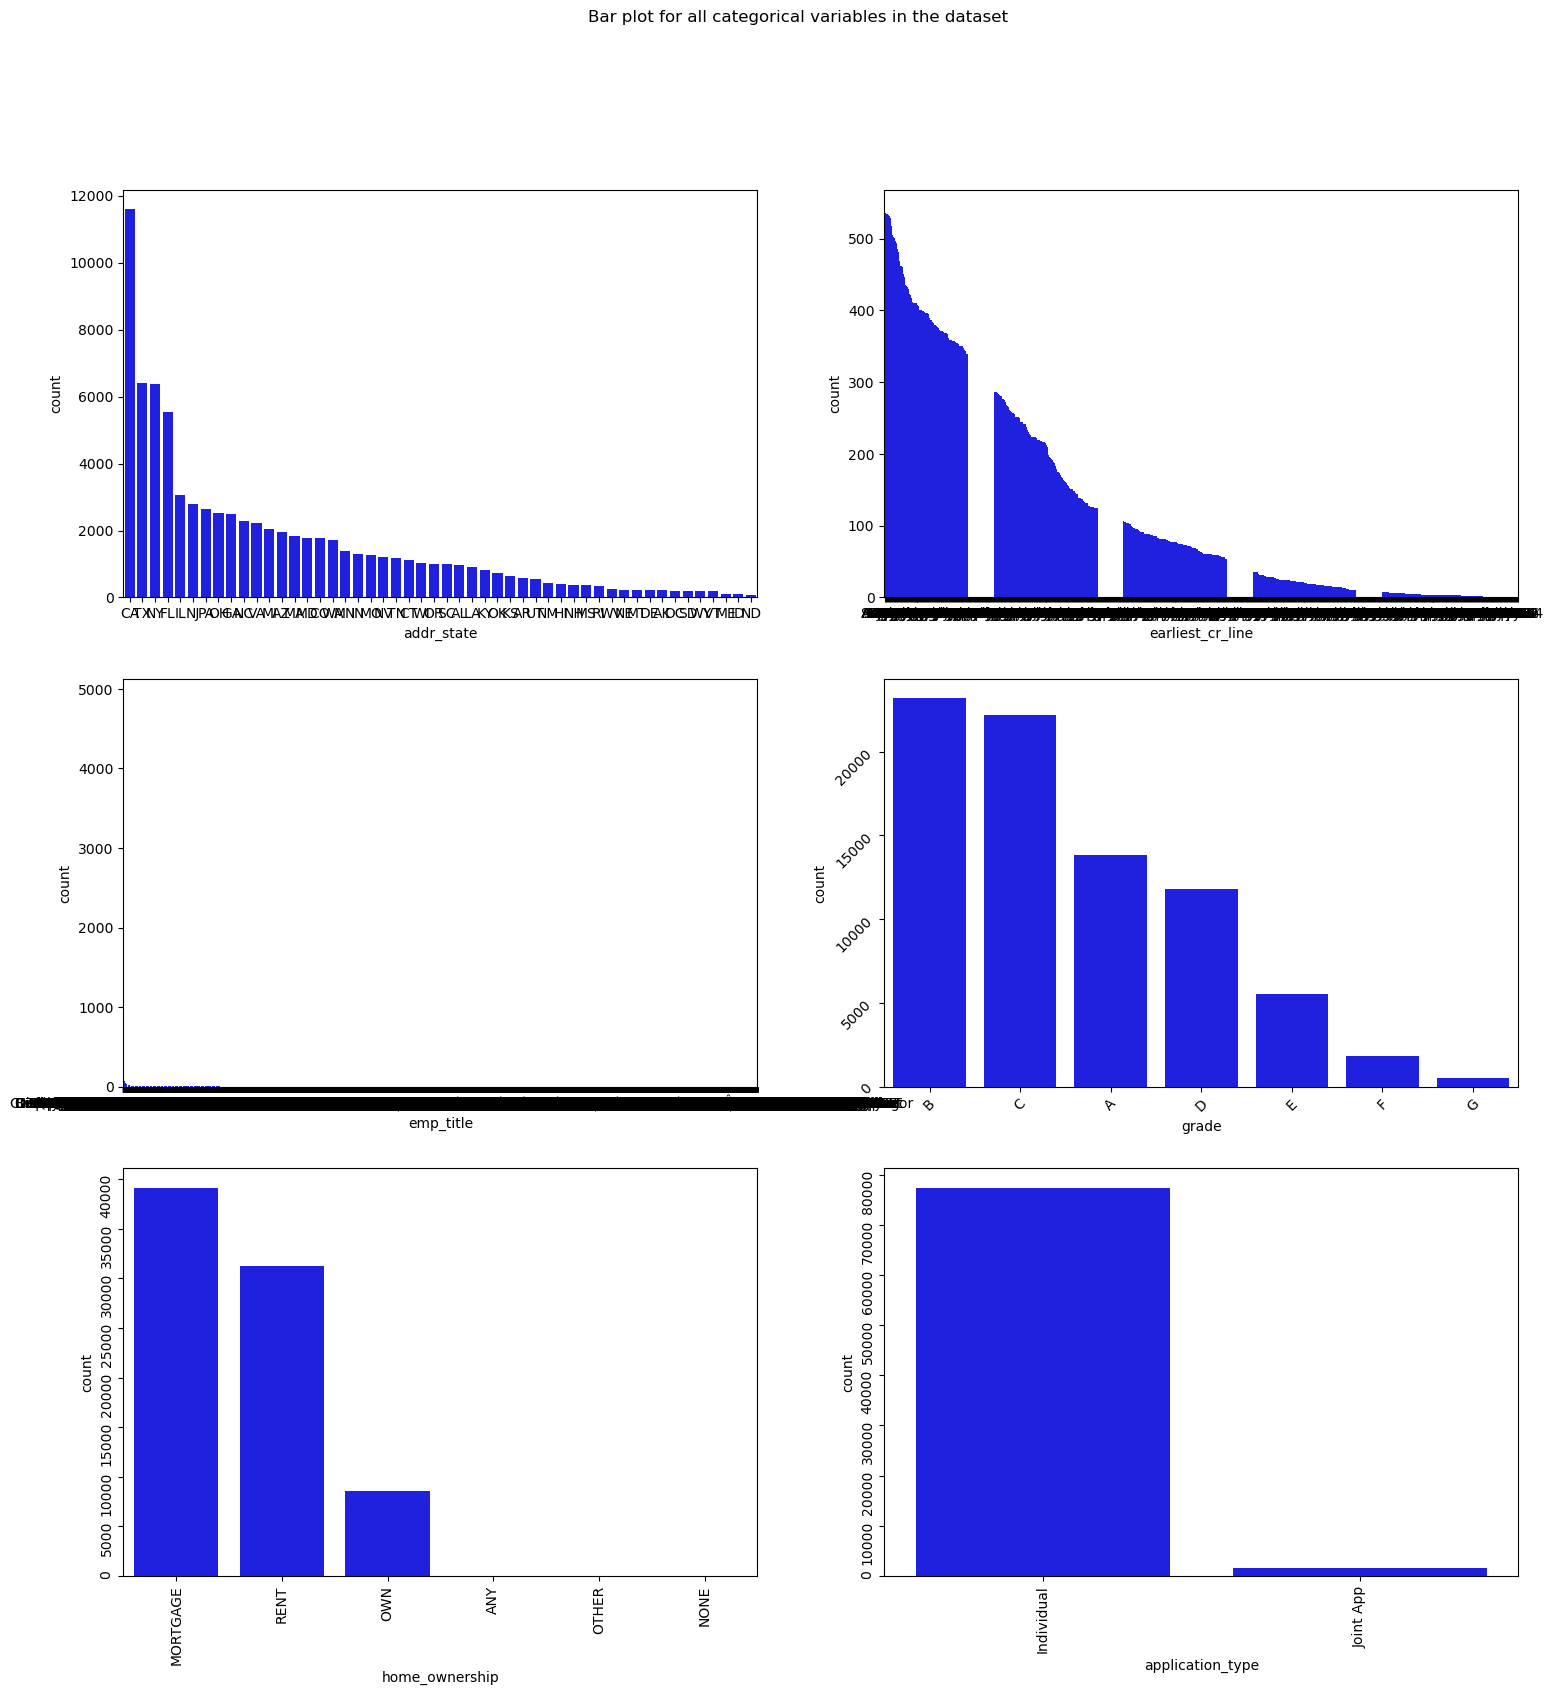

In [105]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')


sns.countplot(ax = axes[0, 0], x = 'addr_state', data = df, color = 'blue', 
                  order = df['addr_state'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'earliest_cr_line', data = df, color = 'blue', 
                  order = df['earliest_cr_line'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'emp_title', data = df, color = 'blue', 
                  order = df['emp_title'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'grade', data = df, color = 'blue', 
                  order = df['grade'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'home_ownership', data = df, color = 'blue', 
                  order = df['home_ownership'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'application_type', data = df, color = 'blue', 
                  order = df['application_type'].value_counts().index);
    
    
    
      
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [ ]:
df.info()

In [126]:
df.drop(columns=['emp_length'],inplace=True)

In [ ]:
df.isnull().sum()

# Feature Selection


In [14]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# Select the specific columns



In [15]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [16]:
cat_data = df.select_dtypes(include=['object'])
X = cat_data.iloc[:, :-1].values
y = cat_data.iloc[:,-1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [18]:
def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=chi2, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [19]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc,
                                            y_train_enc,X_test,5)

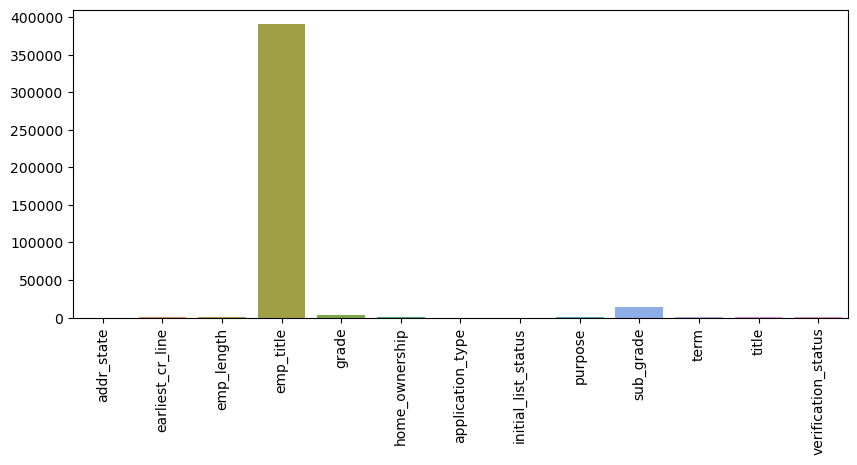

In [20]:
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(cat_data.columns[i])
    values.append(fs.scores_[i])
chi_list = zip(names, values)

# plot the scores
plt.figure(figsize=(10,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

In [21]:
fs.get_feature_names_out()

array(['x3', 'x4', 'x9', 'x10', 'x11'], dtype=object)

array([['MO', 'Jul-91', '10+ years', ..., ' 36 months', 'car',
        'Verified'],
       ['CA', 'Jul-87', '8 years', ..., ' 36 months', 'car',
        'Not Verified'],
       ['OR', 'Feb-00', '7 years', ..., ' 36 months', 'car', 'Verified'],
       ...,
       ['MA', 'Nov-99', '4 years', ..., ' 36 months', 'wedding',
        'Not Verified'],
       ['CA', 'Aug-03', '4 years', ..., ' 36 months', 'wedding',
        'Not Verified'],
       ['NY', 'Feb-96', '6 years', ..., ' 36 months', 'wedding',
        'Verified']], dtype=object)

In [22]:
df['emp_title'].nunique()

36316

In [ ]:
#too many categories in emp_title so i will drop this column

In [23]:
df['title'].nunique()

5320

In [227]:
#too many categories in title not as much as emp_title so going to reduce categories for easier processing

In [24]:
df['title']=df['purpose']
# I did this because looking at the column purpose it acts as a root category to title ex. all the values in title relating to car loan, truck loan etc are all conveniently categorized in purpose

In [ ]:
#going to onehotencode the top 5 categories given in the k chi square

In [170]:
encoder=OneHotEncoder(sparse_output=False,drop="first")
encoder.fit(df[['sub_grade']])
transformed=encoder.transform(df[['sub_grade']])
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())
#concat with original data
df_dem=pd.concat([df.reset_index(drop=True),ohe_df.reset_index(drop=True)], axis=1).drop(['sub_grade'],axis=1)


In [171]:

encoder=OneHotEncoder(sparse_output=False,drop="first")
encoder.fit(df_dem[['grade']])
transformed=encoder.transform(df_dem[['grade']])
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())

df_dem=pd.concat([df_dem.reset_index(drop=True),ohe_df.reset_index(drop=True)], axis=1).drop(['grade'],axis=1)



In [172]:


encoder=OneHotEncoder(sparse_output=False,drop="first")
encoder.fit(df_dem[['home_ownership']])
transformed=encoder.transform(df_dem[['home_ownership']])
print(transformed)
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())

df_dem=pd.concat([df_dem.reset_index(drop=True),ohe_df.reset_index(drop=True)], axis=1).drop(['home_ownership'],axis=1)
#

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [173]:


encoder=OneHotEncoder(sparse_output=False,drop="first")
encoder.fit(df_dem[['term']])
transformed=encoder.transform(df_dem[['term']])
print(transformed)
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())

df_dem=pd.concat([df_dem.reset_index(drop=True),ohe_df.reset_index(drop=True)], axis=1).drop(['term'],axis=1)
#

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [174]:
encoder=LabelEncoder()
df_dem['loan_status'] = encoder.fit_transform(df['loan_status'])

In [175]:
df_dem['Interest_income']=df_dem["loan_amnt"]*df_dem['int_rate']


In [180]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78947 entries, 0 to 78946
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annual_inc               78947 non-null  float64
 1   earliest_cr_line         78947 non-null  object 
 2   int_rate                 78947 non-null  float64
 3   loan_amnt                78947 non-null  int64  
 4   num_actv_bc_tl           78947 non-null  float64
 5   mort_acc                 78947 non-null  float64
 6   tot_cur_bal              78947 non-null  float64
 7   open_acc                 78947 non-null  int64  
 8   pub_rec                  78947 non-null  int64  
 9   pub_rec_bankruptcies     78947 non-null  float64
 10  revol_bal                78947 non-null  int64  
 11  revol_util               78947 non-null  float64
 12  title                    78947 non-null  object 
 13  total_acc                78947 non-null  int64  
 14  loan_status           

In [177]:
#drop the unnecesary columns
df_dem.drop(columns=['emp_title','emp_length','addr_state','application_type','verification_status','initial_list_status','purpose'],inplace=True)


In [182]:
df_dem.drop(columns=['earliest_cr_line'],inplace=True)
df_dem.drop(columns=['title'],inplace=True)

In [178]:
df_dem['fico_avg']=(df_dem['fico_range_high']+df_dem['fico_range_low'])/2

KeyError: 'fico_range_high'

In [252]:
df_dem.drop(columns=['fico_range_high','fico_range_low'],inplace=True)

In [184]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
X, y = sm.fit_resample(df_dem.drop('loan_status', axis=1), df_dem['loan_status'])
oversampled = pd.concat([pd.DataFrame(y), pd.DataFrame(X)], axis=1)

In [120]:
oversampled['loan_status'].value_counts()

loan_status
1    63295
0    63295
Name: count, dtype: int64

In [185]:
from sklearn import preprocessing
# create a MinMaxScaler object
scaler = preprocessing.MinMaxScaler()

# fit and transform the data
normalized_data = scaler.fit_transform(oversampled)
scaled_df = pd.DataFrame(oversampled, columns=df_dem.columns)


In [186]:
X=scaled_df.drop(columns=['loan_status'])

In [187]:
y=scaled_df['loan_status']

In [188]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    random_state=40)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.35, random_state=43) 
# prepare input data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)



In [189]:
rf = RandomForestClassifier(max_features= 7, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)


In [190]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

mse = math.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:",mse)

RMSE: 0.35687688508939763


In [191]:
mae = mean_absolute_error(y_pred, y_val)
print("The MAE of the random forest model is:", mae)

The MAE of the random forest model is: 0.12736111111111112


In [192]:
from sklearn.metrics import f1_score,confusion_matrix,recall_score,precision_score,accuracy_score

f1_score(y_val, y_pred,pos_label=1)

0.8829311885612154

In [193]:
confusion_matrix(y_val, y_pred)

array([[11300,  3185],
       [  483, 13832]], dtype=int64)

In [194]:
recall_average = recall_score(y_val, y_pred, average="binary",pos_label=1.0)
recall_average

0.9662591687041565

In [195]:

precision_score(y_val, y_pred,pos_label=1)

0.8128342245989305

In [196]:
score =accuracy_score(y_val,y_pred)
score

0.8726388888888889

In [197]:
y_pred = rf.predict(X_test)

In [198]:
confusion_matrix(y_test, y_pred)

array([[17347,  5001],
       [  786, 21173]], dtype=int64)

In [199]:
recall_average = recall_score(y_test, y_pred, average="binary",pos_label=1.0)
recall_average

0.9642060203105788

In [200]:

precision_score(y_test, y_pred,pos_label=1)

0.8089325284633606

In [201]:
score =accuracy_score(y_test,y_pred)
score

0.8693885841966281

In [202]:
f1_score(y_test, y_pred,pos_label=1)

0.8797706355307169

In [66]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [213]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)

KeyboardInterrupt: 

In [ ]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

In [203]:
   
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [204]:
model=RandomForestClassifier(max_features= 7, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X, y, cv = k_folds)

In [205]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8278695  0.79038629 0.79654791 0.96579509 0.99131053]
Average CV Score:  0.874381862706375
Number of CV Scores used in Average:  5


KeyError: 'sub_grade'